# STAT 682 HW1

**Jackson Thetford, Judy Fang, Ryker Dolese, Sirui Hao, Martín Hecht**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, jarque_bera, anderson, skew, kurtosis, probplot
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Load and clean the data
sp500_data = pd.read_excel('Homework 1 Data.xlsx', sheet_name='S&P 500 DATA')
sp500_data.head()

,AAPL US Equity,Unnamed: 1,Unnamed: 2,MSFT US Equity,Unnamed: 4,Unnamed: 5,NVDA US Equity,Unnamed: 7,Unnamed: 8,GOOG US Equity,...,Unnamed: 23,TSLA US Equity,Unnamed: 25,Unnamed: 26,AVGO US Equity,Unnamed: 28,Unnamed: 29,SPX Index,Unnamed: 31,Unnamed: 32
0,APPLE INC,NaN,NaN,MICROSOFT CORP,NaN,NaN,NVIDIA CORP,NaN,NaN,ALPHABET INC-CL C,...,NaN,TESLA INC,NaN,NaN,BROADCOM INC,NaN,NaN,S&P 500 INDEX,NaN,NaN
1,Date APPLE INC,APPLE INC Price,APPLE INC Volume,Date MICROSOFT CORP,MICROSOFT CORP Price,MICROSOFT CORP Volume,Date NVIDIA CORP,NVIDIA CORP Price,NVIDIA CORP Volume,Date ALPHABET INC-CL C,...,ELI LILLY & CO Volume,Date TESLA INC,TESLA INC Price,TESLA INC Volume,Date BROADCOM INC,BROADCOM INC Price,BROADCOM INC Volume,Date S&P 500 INDEX,S&P 500 INDEX Price,S&P 500 INDEX Volume
2,1980-12-12 00:00:00,NaN,469033600,1986-03-13 00:00:00,0.0972,1031788800,1999-01-21 00:00:00,0.025,NaN,2014-03-27 00:00:00,...,1091200,2010-06-28 00:00:00,1.1333,NaN,2009-08-05 00:00:00,1.5,NaN,1970-01-02 00:00:00,93,NaN
3,1980-12-15 00:00:00,NaN,175884800,1986-03-14 00:00:00,0.1007,308160000,1999-01-22 00:00:00,0.041,2714688000,2014-03-28 00:00:00,...,1068800,2010-06-29 00:00:00,1.5927,281749140,2009-08-06 00:00:00,1.618,241984090,1970-01-05 00:00:00,93.46,NaN
4,1980-12-16 00:00:00,NaN,105728000,1986-03-17 00:00:00,0.1024,133171200,1999-01-25 00:00:00,0.0453,510480000,2014-03-31 00:00:00,...,611200,2010-06-30 00:00:00,1.5887,257915910,2009-08-07 00:00:00,1.643,24542720,1970-01-06 00:00:00,92.82,NaN


In [ ]:
# Define column names (adjust for 33 columns)
columns = ['Date_AAPL', 'AAPL_Price', 'AAPL_Volume',
           'Date_MSFT', 'MSFT_Price', 'MSFT_Volume',
           'Date_NVDA', 'NVDA_Price', 'NVDA_Volume',
           'Date_GOOG', 'GOOG_Price', 'GOOG_Volume',
           'Date_AMZN', 'AMZN_Price', 'AMZN_Volume',
           'Date_META', 'META_Price', 'META_Volume',
           'Date_BRK/B', 'BRK/BPrice', 'BRK/BVolume',
           'Date_LLY', 'LLY_Price', 'LLY_Volume',
           'Date_TSLA', 'TSLA_Price', 'TSLA_Volume',
           'Date_AVGO', 'AVGO_Price', 'AVGO_Volume',
           'Date_SPX', 'SPX_Price', 'SPX_Volume']

# Clean the data by skipping the first two rows
sp500_data_clean = sp500_data.copy()
sp500_data_clean= sp500_data_clean.drop([0, 1])  # Dropping the first two metadata rows
sp500_data_clean.columns = columns

sp500_data_clean.head()

,Date_AAPL,AAPL_Price,AAPL_Volume,Date_MSFT,MSFT_Price,MSFT_Volume,Date_NVDA,NVDA_Price,NVDA_Volume,Date_GOOG,...,LLY_Volume,Date_TSLA,TSLA_Price,TSLA_Volume,Date_AVGO,AVGO_Price,AVGO_Volume,Date_SPX,SPX_Price,SPX_Volume
2,1980-12-12 00:00:00,NaN,469033600,1986-03-13 00:00:00,0.0972,1031788800,1999-01-21 00:00:00,0.025,NaN,2014-03-27 00:00:00,...,1091200,2010-06-28 00:00:00,1.1333,NaN,2009-08-05 00:00:00,1.5,NaN,1970-01-02 00:00:00,93,NaN
3,1980-12-15 00:00:00,NaN,175884800,1986-03-14 00:00:00,0.1007,308160000,1999-01-22 00:00:00,0.041,2714688000,2014-03-28 00:00:00,...,1068800,2010-06-29 00:00:00,1.5927,281749140,2009-08-06 00:00:00,1.618,241984090,1970-01-05 00:00:00,93.46,NaN
4,1980-12-16 00:00:00,NaN,105728000,1986-03-17 00:00:00,0.1024,133171200,1999-01-25 00:00:00,0.0453,510480000,2014-03-31 00:00:00,...,611200,2010-06-30 00:00:00,1.5887,257915910,2009-08-07 00:00:00,1.643,24542720,1970-01-06 00:00:00,92.82,NaN
5,1980-12-17 00:00:00,NaN,86441600,1986-03-18 00:00:00,0.0998,66470400,1999-01-26 00:00:00,0.0418,343200000,2014-04-01 00:00:00,...,782400,2010-07-01 00:00:00,1.464,123447945,2009-08-10 00:00:00,1.597,24209150,1970-01-07 00:00:00,92.63,NaN
6,1980-12-18 00:00:00,NaN,73449600,1986-03-19 00:00:00,0.0981,47894400,1999-01-27 00:00:00,0.0417,244368000,2014-04-02 00:00:00,...,1444800,2010-07-02 00:00:00,1.28,77127105,2009-08-11 00:00:00,1.567,23053710,1970-01-08 00:00:00,92.68,NaN


# Part 1
For the entire S&P 500 and 2 of the Top 10 constituents of the S&P 500

## Part 1-1
Describe the distribution of daily price (close), daily volume, daily net returns, monthly net returns, and yearly net returns.
Using:
- Histograms
- Box plots
- Normality Tests (at least 3)
- QQ-plots
- Sample Volatility
- Sample kurtosis
- Sample skewness

**682:** Perform the analysis above for 2 of the top 10 constituents of the S&P 500 and the overall S&P 500

**Use entire S&P 500, AAPL and TSLA**

In [ ]:
# Extract relevant columns for AAPL and S&P 500
aapl_data = sp500_data_clean[['Date_AAPL', 'AAPL_Price', 'AAPL_Volume']]

spx_data = sp500_data_clean[['Date_SPX', 'SPX_Price', 'SPX_Volume']]

tsla_data = sp500_data_clean[['Date_TSLA', 'TSLA_Price', 'TSLA_Volume']]

# Convert the Date and Price columns to appropriate data types
aapl_data['Date_AAPL'] = pd.to_datetime(aapl_data['Date_AAPL'])
aapl_data['AAPL_Price'] = pd.to_numeric(aapl_data['AAPL_Price'], errors='coerce')
aapl_data['AAPL_Volume'] = pd.to_numeric(aapl_data['AAPL_Volume'], errors='coerce')

spx_data['Date_SPX'] = pd.to_datetime(spx_data['Date_SPX'])
spx_data['SPX_Price'] = pd.to_numeric(spx_data['SPX_Price'], errors='coerce')
spx_data['SPX_Volume'] = pd.to_numeric(spx_data['SPX_Volume'], errors='coerce')

tsla_data['Date_TSLA'] = pd.to_datetime(tsla_data['Date_TSLA'])
tsla_data['TSLA_Price'] = pd.to_numeric(tsla_data['TSLA_Price'], errors='coerce')
tsla_data['TSLA_Volume'] = pd.to_numeric(tsla_data['TSLA_Volume'], errors='coerce')


aapl_data.head(), spx_data.head(), tsla_data.head()


(   Date_AAPL  AAPL_Price  AAPL_Volume
 2 1980-12-12         NaN  469033600.0
 3 1980-12-15         NaN  175884800.0
 4 1980-12-16         NaN  105728000.0
 5 1980-12-17         NaN   86441600.0
 6 1980-12-18         NaN   73449600.0,
     Date_SPX  SPX_Price  SPX_Volume
 2 1970-01-02      93.00         NaN
 3 1970-01-05      93.46         NaN
 4 1970-01-06      92.82         NaN
 5 1970-01-07      92.63         NaN
 6 1970-01-08      92.68         NaN,
    Date_TSLA  TSLA_Price  TSLA_Volume
 2 2010-06-28      1.1333          NaN
 3 2010-06-29      1.5927  281749140.0
 4 2010-06-30      1.5887  257915910.0
 5 2010-07-01      1.4640  123447945.0
 6 2010-07-02      1.2800   77127105.0)

In [ ]:
# Calculating daily net returns for AAPL and SPX
# Daily net returns = (Price today - Price yesterday) / Price yesterday
aapl_data['AAPL_Daily_Return'] = aapl_data['AAPL_Price'].pct_change()
spx_data['SPX_Daily_Return'] = spx_data['SPX_Price'].pct_change()
tsla_data['TSLA_Daily_Return'] = tsla_data['TSLA_Price'].pct_change()

aapl_data.head(), spx_data.head(), tsla_data.head()

(   Date_AAPL  AAPL_Price  AAPL_Volume  AAPL_Daily_Return
 2 1980-12-12         NaN  469033600.0                NaN
 3 1980-12-15         NaN  175884800.0                NaN
 4 1980-12-16         NaN  105728000.0                NaN
 5 1980-12-17         NaN   86441600.0                NaN
 6 1980-12-18         NaN   73449600.0                NaN,
     Date_SPX  SPX_Price  SPX_Volume  SPX_Daily_Return
 2 1970-01-02      93.00         NaN               NaN
 3 1970-01-05      93.46         NaN          0.004946
 4 1970-01-06      92.82         NaN         -0.006848
 5 1970-01-07      92.63         NaN         -0.002047
 6 1970-01-08      92.68         NaN          0.000540,
    Date_TSLA  TSLA_Price  TSLA_Volume  TSLA_Daily_Return
 2 2010-06-28      1.1333          NaN                NaN
 3 2010-06-29      1.5927  281749140.0           0.405365
 4 2010-06-30      1.5887  257915910.0          -0.002511
 5 2010-07-01      1.4640  123447945.0          -0.078492
 6 2010-07-02      1.2800   77

In [ ]:
# Add a year_month column for monthly grouping
aapl_data['year_month'] = aapl_data['Date_AAPL'].dt.to_period('M')
spx_data['year_month'] = spx_data['Date_SPX'].dt.to_period('M')
tsla_data['year_month'] = tsla_data['Date_TSLA'].dt.to_period('M')

# Calculate monthly returns for AAPL and SPX
# 1+ is to transforms daily returns into growth factors,
# .prod() to give the total compounded ,
# -1 converts the final product back into a percentage return for year-month
aapl_monthly_returns = aapl_data.groupby('year_month').apply(lambda x: (1 + x['AAPL_Daily_Return']).prod() - 1).reset_index(name='AAPL_Monthly_Return')
spx_monthly_returns = spx_data.groupby('year_month').apply(lambda x: (1 + x['SPX_Daily_Return']).prod() - 1).reset_index(name='SPX_Monthly_Return')
tsla_monthly_returns = tsla_data.groupby('year_month').apply(lambda x: (1 + x['TSLA_Daily_Return']).prod() - 1).reset_index(name='TSLA_Monthly_Return')


# For monthly returns, explicitly set the first value as NaN
aapl_monthly_returns['AAPL_Monthly_Return'].iloc[0] = np.nan
spx_monthly_returns['SPX_Monthly_Return'].iloc[0] = np.nan
tsla_monthly_returns['TSLA_Monthly_Return'].iloc[0] = np.nan

aapl_monthly_returns.head(), spx_monthly_returns.head(), tsla_monthly_returns.head()


(  year_month  AAPL_Monthly_Return
 0    1980-12                  NaN
 1    1981-01                  0.0
 2    1981-02                  0.0
 3    1981-03                  0.0
 4    1981-04                  0.0,
   year_month  SPX_Monthly_Return
 0    1970-01                 NaN
 1    1970-02            0.052693
 2    1970-03            0.001453
 3    1970-04           -0.090483
 4    1970-05           -0.060967,
   year_month  TSLA_Monthly_Return
 0    2010-06                  NaN
 1    2010-07            -0.163278
 2    2010-08            -0.023020
 3    2010-09             0.047432
 4    2010-10             0.070352)

In [ ]:
# Add a year column for yearly grouping
aapl_data['year'] = aapl_data['Date_AAPL'].dt.year
spx_data['year'] = spx_data['Date_SPX'].dt.year
tsla_data['year'] = tsla_data['Date_TSLA'].dt.year

# Calculate yearly returns for AAPL and SPX
aapl_yearly_returns = aapl_data.groupby('year').apply(lambda x: (1 + x['AAPL_Daily_Return']).prod() - 1).reset_index(name='AAPL_Yearly_Return')
spx_yearly_returns = spx_data.groupby('year').apply(lambda x: (1 + x['SPX_Daily_Return']).prod() - 1).reset_index(name='SPX_Yearly_Return')
tsla_yearly_returns = tsla_data.groupby('year').apply(lambda x: (1 + x['TSLA_Daily_Return']).prod() - 1).reset_index(name='TSLA_Yearly_Return')

# For yearly returns, explicitly set the first value as NaN
aapl_yearly_returns['AAPL_Yearly_Return'].iloc[0] = np.nan
spx_yearly_returns['SPX_Yearly_Return'].iloc[0] = np.nan
tsla_yearly_returns['TSLA_Yearly_Return'].iloc[0] = np.nan


aapl_yearly_returns.head(), spx_yearly_returns.head(), tsla_yearly_returns.head()


(     year  AAPL_Yearly_Return
 0  1980.0                 NaN
 1  1981.0            0.000000
 2  1982.0           -0.082759
 3  1983.0           -0.180451
 4  1984.0            0.192661,
    year  SPX_Yearly_Return
 0  1970                NaN
 1  1971           0.107868
 2  1972           0.156333
 3  1973          -0.173655
 4  1974          -0.297181,
      year  TSLA_Yearly_Return
 0  2010.0                 NaN
 1  2011.0            0.072495
 2  2012.0            0.185924
 3  2013.0            3.441364
 4  2014.0            0.478501)

In [ ]:
# Helper function to plot histograms, boxplots, QQ-plots and perform normality tests
def generate_plots(data, column_name, title_prefix):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Histogram
    sns.histplot(data[column_name], kde=True, ax=axs[0])
    axs[0].set_title(f'{title_prefix} Histogram', fontsize=18)
    axs[0].set_xlabel('Values', fontsize=14)
    axs[0].set_ylabel('Frequency', fontsize=14)

    # Box plot
    sns.boxplot(x=data[column_name], ax=axs[1])
    axs[1].set_title(f'{title_prefix} Boxplot', fontsize=18)
    axs[1].set_xlabel('Values', fontsize=14)

    # QQ-plot
    probplot(data[column_name].dropna(), dist="norm", plot=axs[2])
    axs[2].set_title(f'{title_prefix} QQ-plot', fontsize=18)
    axs[2].set_xlabel('Theoretical Quantiles', fontsize=14)
    axs[2].set_ylabel('Sample Quantiles', fontsize=14)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

def normality_test(data, column_name, title_prefix):
    print(f'Normality Tests for {title_prefix}\n')
    # Shapiro-Wilk test
    stat, p_shapiro = shapiro(data[column_name].dropna())
    print(f'Shapiro-Wilk test: Statistic={stat}, p-value={p_shapiro}')
    if p_shapiro < 0.05:
        print('Result: Reject the null hypothesis (data is not normally distributed)\n')
    else:
        print('Result: Fail to reject the null hypothesis (data is normally distributed)\n')

    # Jarque-Bera test
    stat, p_jarque_bera = jarque_bera(data[column_name].dropna())
    print(f'Jarque-Bera test: Statistic={stat}, p-value={p_jarque_bera}')
    if p_jarque_bera < 0.05:
        print('Result: Reject the null hypothesis (data is not normally distributed)\n')
    else:
        print('Result: Fail to reject the null hypothesis (data is normally distributed)\n')

    # Anderson-Darling test
    result_anderson = anderson(data[column_name].dropna(), dist='norm')
    print(f'Anderson-Darling test: Statistic={result_anderson.statistic}')
    print(f'Critical values: {result_anderson.critical_values}')
    print(f'Significance levels: {result_anderson.significance_level}')

    # We focus on the 5% significance level for interpretation (index 2)
    critical_value_5_percent = result_anderson.critical_values[2]
    if result_anderson.statistic > critical_value_5_percent:
        print("Result: Reject the null hypothesis at 5% significance (data is not normally distributed)\n")
    else:
        print("Result: Fail to reject the null hypothesis at 5% significance (data is normally distributed)\n")

def get_sample_stat(data, column_name, title_prefix, sample_size = 3500):
    data_sample = data[column_name].dropna().sample(n=sample_size, random_state=42)

    # Sample volatility, kurtosis, skewness
    volatility = np.std(data_sample)
    sample_skewness = skew(data_sample)
    sample_kurtosis = kurtosis(data_sample)

    print(f'{title_prefix} Sample Volatility (Standard Deviation): {volatility}')
    print(f'{title_prefix} Sample Skewness: {sample_skewness}')
    print(f'{title_prefix} Sample Kurtosis: {sample_kurtosis}\n')


### Analysis for S&P 500

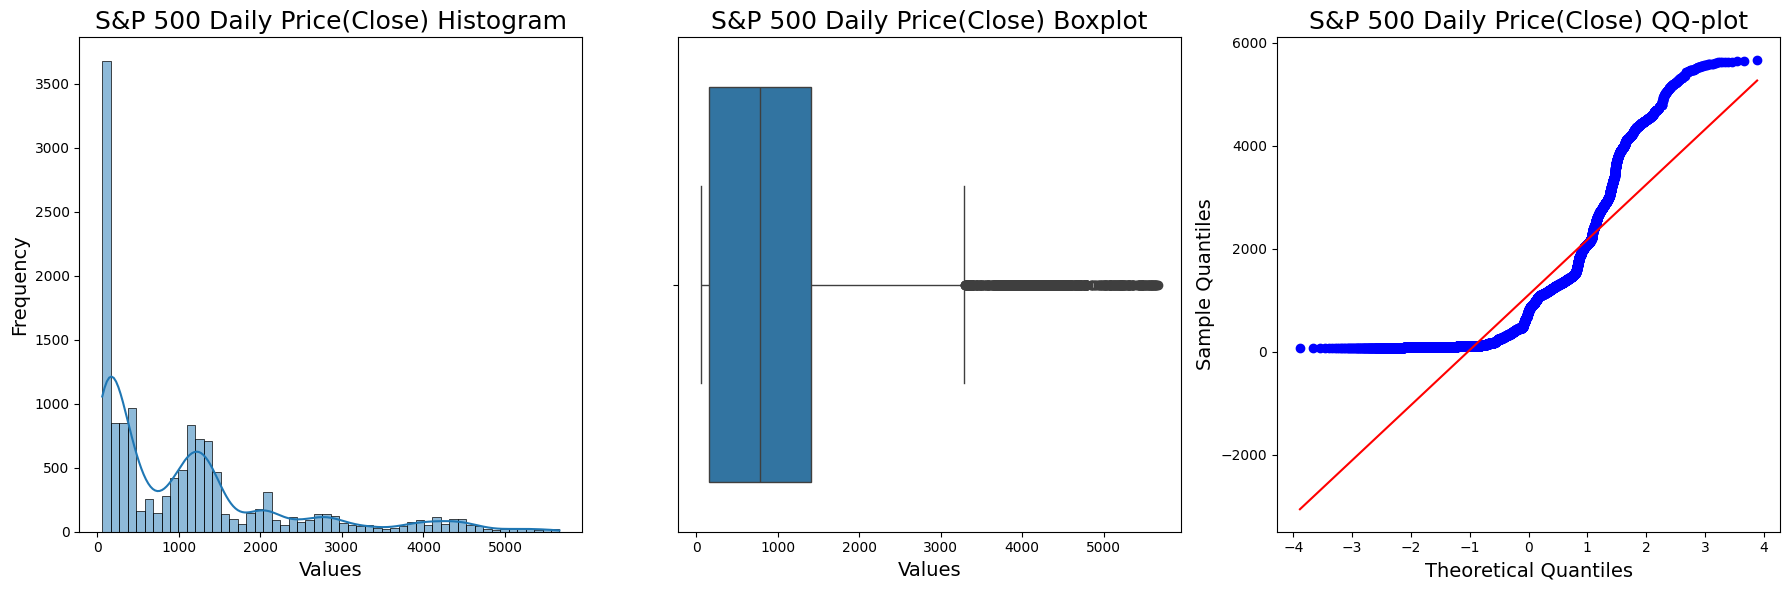

Normality Tests for S&P 500 Daily Price(Close)

Shapiro-Wilk test: Statistic=0.8001364001080731, p-value=6.146885129818573e-84
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=8061.690857430894, p-value=0.0
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=859.3851771908667
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

S&P 500 Daily Price(Close) Sample Volatility (Standard Deviation): 1186.0836745983786
S&P 500 Daily Price(Close) Sample Skewness: 1.630349295487986
S&P 500 Daily Price(Close) Sample Kurtosis: 2.321264278340352



In [ ]:
# analysis for S&P 500 daily price

generate_plots(spx_data, 'SPX_Price', 'S&P 500 Daily Price(Close)')
normality_test(spx_data, 'SPX_Price', 'S&P 500 Daily Price(Close)')
get_sample_stat(spx_data, 'SPX_Price', 'S&P 500 Daily Price(Close)')

#### Describing the distribution
In our first set of plots describing the daily close price of the S&P500, we see that the distribution has a strong right skew. Moreover, as seen in the KDE and the histogram, the daily close price appears multi-modal, with smaller peaks as price increases. Overall, the right skew makes sense, as the S&P500 tends to increase year over year in a compounding fashion (approximately 8-10% per year). This results in prices that will skew the distribution, especially when data from decades before is included.

The QQ-plot reaffirms the notion that this distribution is non-normal with the rather extreme deviations from the theoretical normal quantiles. We performed three tests: the Shapiro-Wilk test, the Jarque-Bera test, and the Anderson-Darling test -- all of which suggest the distribtuion of daily close price for the S&P500 is not close to that of a normal distribution. All p-values approach 0.

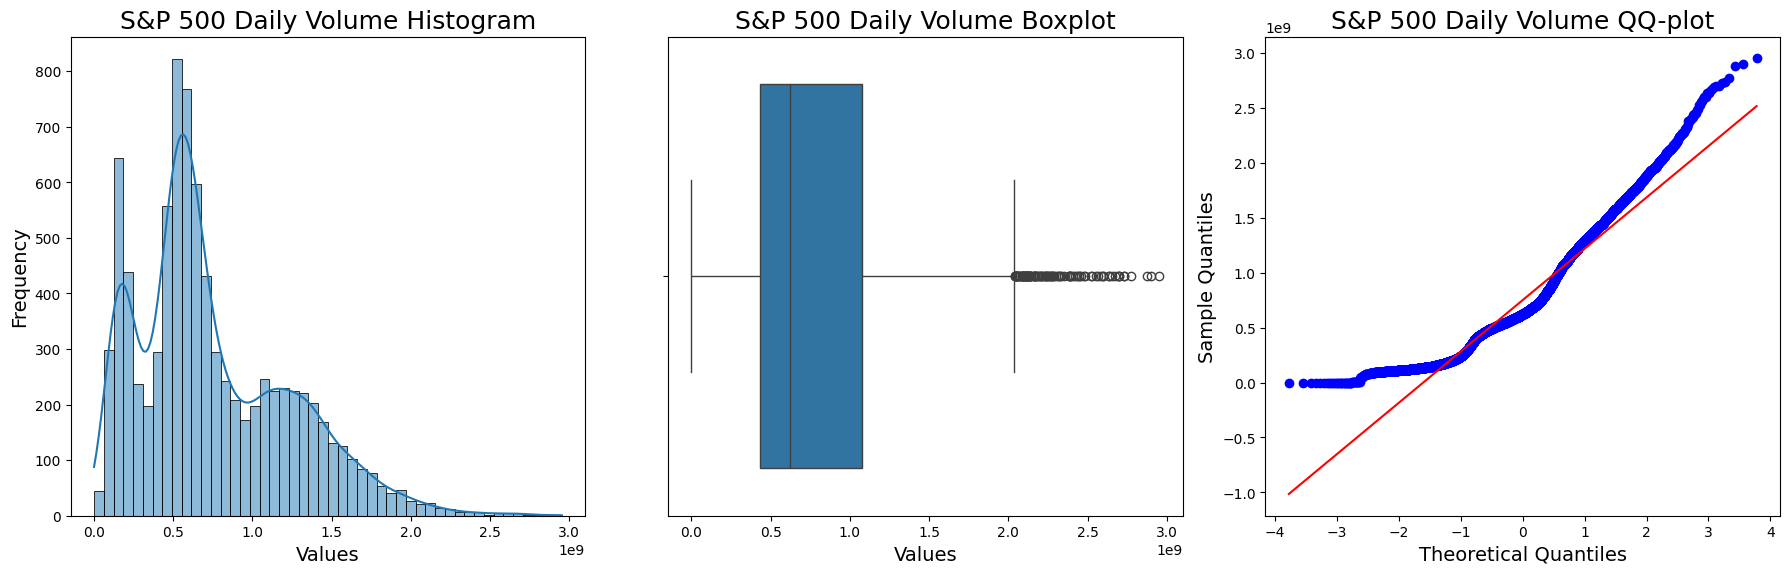

Normality Tests for S&P 500 Daily Volume

Shapiro-Wilk test: Statistic=0.9354883983679241, p-value=9.643359693482566e-52
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=1156.5907725389654, p-value=7.071390700476182e-252
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=170.05588564028767
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

S&P 500 Daily Volume Sample Volatility (Standard Deviation): 484831906.3528871
S&P 500 Daily Volume Sample Skewness: 0.8735634470479424
S&P 500 Daily Volume Sample Kurtosis: 0.4876842007711857



In [ ]:
# analysis for S&P 500 daily voulume

generate_plots(spx_data, 'SPX_Volume', 'S&P 500 Daily Volume')
normality_test(spx_data, 'SPX_Volume', 'S&P 500 Daily Volume')
get_sample_stat(spx_data, 'SPX_Volume', 'S&P 500 Daily Volume')

#### Describing the distribution

Similar to the daily close price, the distribution of the daily volume for the S&P500 appears multi-modal -- though the right skew isn't quite as pronounced. It would be interesting to see why volume tends to hover around 0.25, 0.75, and 1.25; this might warrant future analysis. The QQ-plot tends to deviate far from that of a normal distribution, as expected, and the normality tests prove this assertion in a more concrete way.

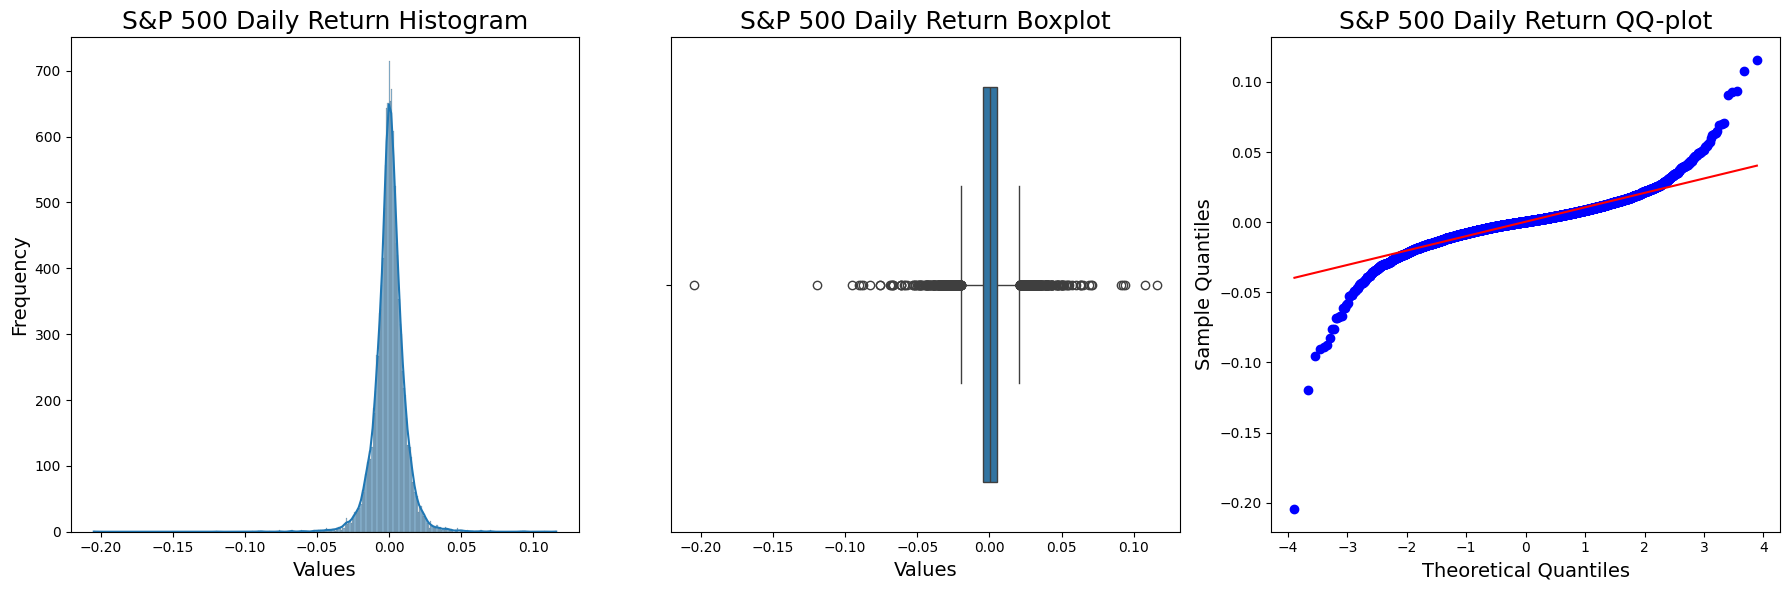

Normality Tests for S&P 500 Daily Return

Shapiro-Wilk test: Statistic=0.9037997152676951, p-value=3.769310463996309e-68
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=199577.61153552364, p-value=0.0
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=194.8583697116519
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

S&P 500 Daily Return Sample Volatility (Standard Deviation): 0.010195447514299228
S&P 500 Daily Return Sample Skewness: 0.10911855911991751
S&P 500 Daily Return Sample Kurtosis: 6.393830597807801



In [ ]:
# analysis for S&P 500 daily return

generate_plots(spx_data, 'SPX_Daily_Return', 'S&P 500 Daily Return')
normality_test(spx_data, 'SPX_Daily_Return', 'S&P 500 Daily Return')
get_sample_stat(spx_data, 'SPX_Daily_Return', 'S&P 500 Daily Return')

#### Describing the distribution
Possibly the most critical indicators for traders, the daily return, has the most symmetrical of the distributions we have seen so far. The S&P500 returns appear centered at a value slightly greater than 0. Yet, the distribution is not perfectly normal, primarily due to its strong left skew: there are days where the return drops to -0.2 but this can not be said in the positive direction. These outliers are typically indicative of "black-swan" events wherein a natural or economic disaster occurs that subsequently affects the market in extreme ways.

Overall, the spread of the daily return appears small (especially when looking at the histogram and boxplots), but the fat tails of the distribution veer away from normality. The QQ-plot deviates from normality at the extremes and the normality tests all have extremely low p-values.

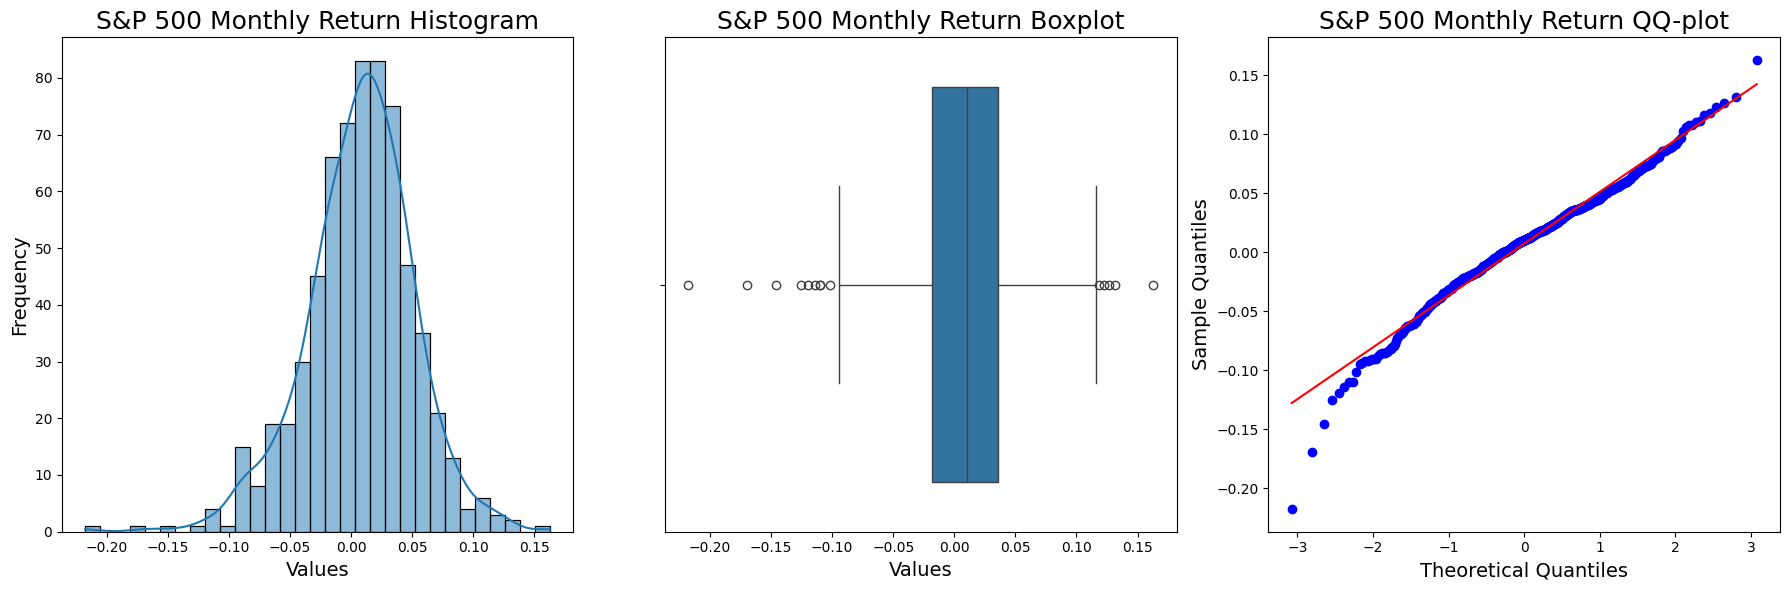

Normality Tests for S&P 500 Monthly Return

Shapiro-Wilk test: Statistic=0.9820756292394659, p-value=3.3809915176158536e-07
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=92.28138111375678, p-value=9.148559141347215e-21
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=2.5144953043636633
Critical values: [0.573 0.652 0.782 0.912 1.085]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

S&P 500 Monthly Return Sample Volatility (Standard Deviation): 0.046113968641292115
S&P 500 Monthly Return Sample Skewness: -0.6800165073044355
S&P 500 Monthly Return Sample Kurtosis: 3.0509060034274613



In [ ]:
# analysis for S&P 500 monthly return

generate_plots(spx_monthly_returns, 'SPX_Monthly_Return', 'S&P 500 Monthly Return')
normality_test(spx_monthly_returns, 'SPX_Monthly_Return', 'S&P 500 Monthly Return')
get_sample_stat(spx_monthly_returns, 'SPX_Monthly_Return', 'S&P 500 Monthly Return', 200)

#### Describing the distribution

Similar to the daily returns, the monthly returns have a relatively symmetrical distribution, but the spread of the data is greater. This makes sense because with more time, there is the possibility for the S&P500 price to grow or shrink significantly.

From this aggregated viewpoint, the QQ-plot also appears to follow normality somewhat closely, only deviating at the extreme low quantiles. However, our normality tests once again provide evidence that our distribution is not normal. This can likely be attributed to the vast amount of data we have, as it becomes easier to prove non-normality.

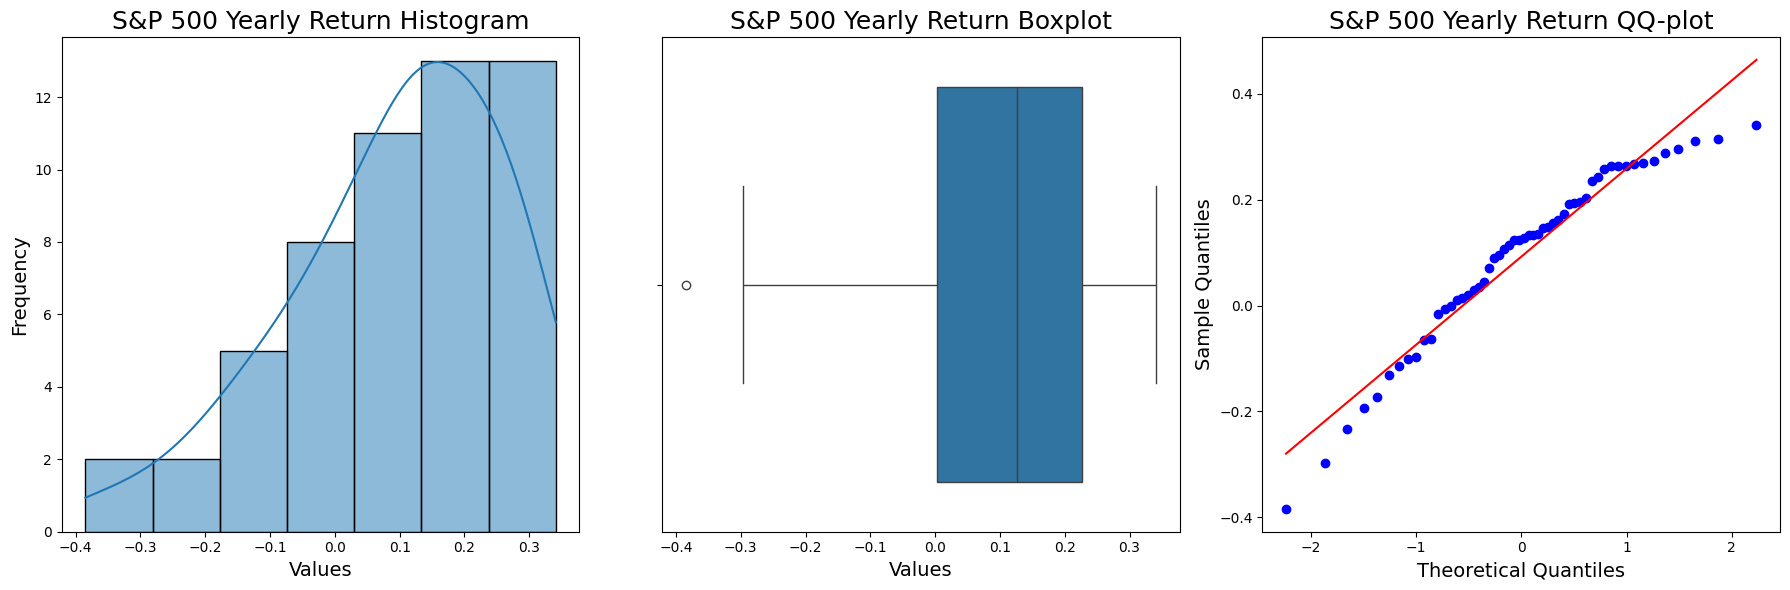

Normality Tests for S&P 500 Yearly Return

Shapiro-Wilk test: Statistic=0.9455144212018612, p-value=0.015932404991285003
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=5.4816785073016865, p-value=0.06451617872739705
Result: Fail to reject the null hypothesis (data is normally distributed)

Anderson-Darling test: Statistic=0.810748260419146
Critical values: [0.541 0.616 0.739 0.862 1.025]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

S&P 500 Yearly Return Sample Volatility (Standard Deviation): 0.1730633970458348
S&P 500 Yearly Return Sample Skewness: -0.9122916490426545
S&P 500 Yearly Return Sample Kurtosis: 0.5744451785006404



In [ ]:
# analysis for S&P 500 yearly return

generate_plots(spx_yearly_returns, 'SPX_Yearly_Return', 'S&P 500 Yearly Return')
normality_test(spx_yearly_returns, 'SPX_Yearly_Return', 'S&P 500 Yearly Return')
get_sample_stat(spx_yearly_returns, 'SPX_Yearly_Return', 'S&P 500 Yearly Return', 30)

#### Describing the distribution
The yearly returns tend to be mostly positive, with the median falling around 0.11. The S&P500 grows most years so we would expect a distribution of this nature. he QQ-plot follows the theoretical quantiles without deviating too much, but it nonetheless doesn't appear normal.

While the distribution of yearly returns doesn't appear particularly normal, the lack of data points makes it hard to reject the null of normality. For this reason, the Jarque-Bera test does not have enough evidence to prove the distribution is non-normal. Perhaps with more data, it would reject the null hypothesis.

### Analysis for AAPL

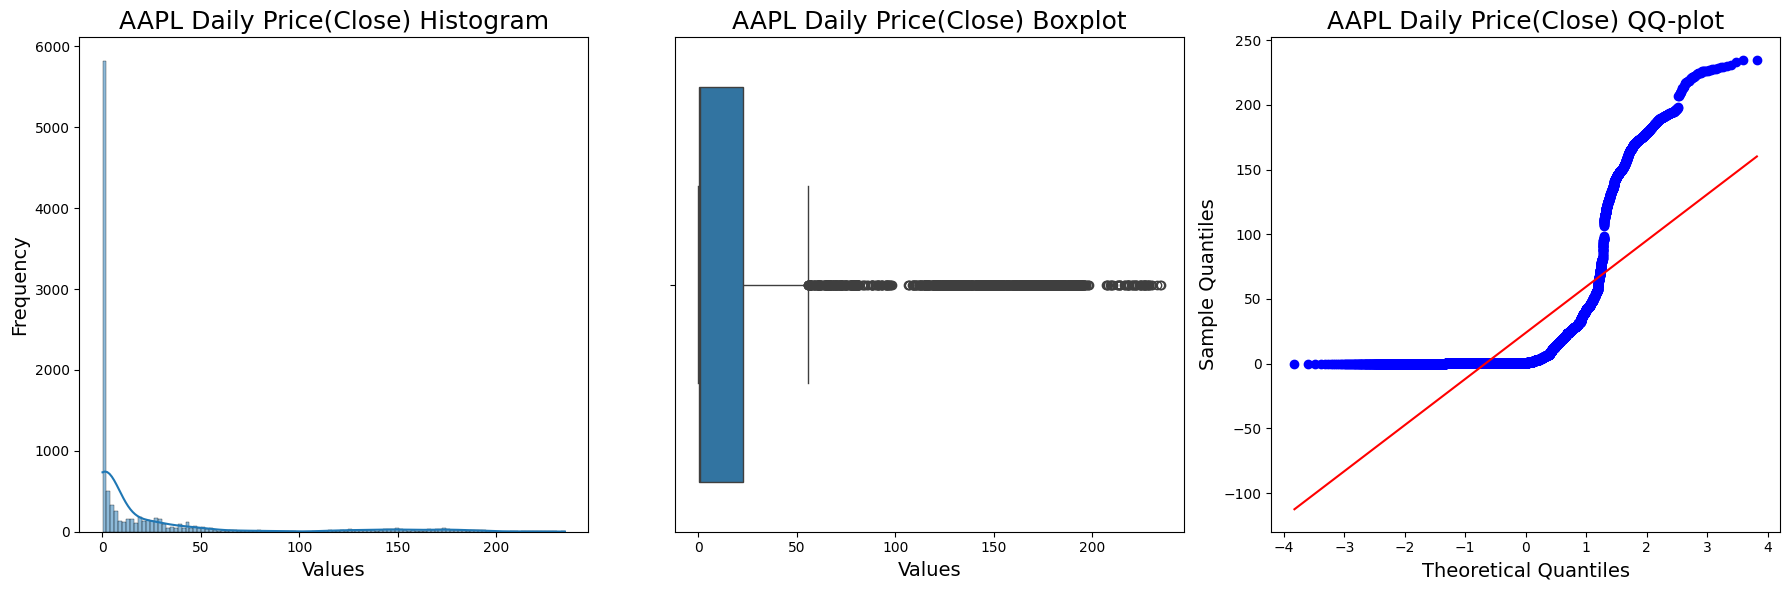

Normality Tests for AAPL Daily Price(Close)

Shapiro-Wilk test: Statistic=0.5550054453547446, p-value=3.797227500241505e-96
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=20959.820325206878, p-value=0.0
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=1939.8012450208535
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

AAPL Daily Price(Close) Sample Volatility (Standard Deviation): 46.35106840327573
AAPL Daily Price(Close) Sample Skewness: 2.4981317425340803
AAPL Daily Price(Close) Sample Kurtosis: 5.325535389102068



In [ ]:
# analysis for AAPL daily price

generate_plots(aapl_data, 'AAPL_Price', 'AAPL Daily Price(Close)')
normality_test(aapl_data, 'AAPL_Price', 'AAPL Daily Price(Close)')
get_sample_stat(aapl_data, 'AAPL_Price', 'AAPL Daily Price(Close)')

#### Describing the distribution
After looking at the key indicators of the S&P500, we have turned our attention to a more granular case, now looking at an individual stock: Apple (AAPL). AAPL's daily close price has an extreme right skew, as suggested by the histogram and the boxplot. One can suppose this is because the stock's price had to start somewhere (close to zero), and since AAPL has become such a lucrative company, the price has grown exponentially over the years.

As expected, the QQ-plot deviates significantly from normality and the tests provide evidence of a non-normal distribution.

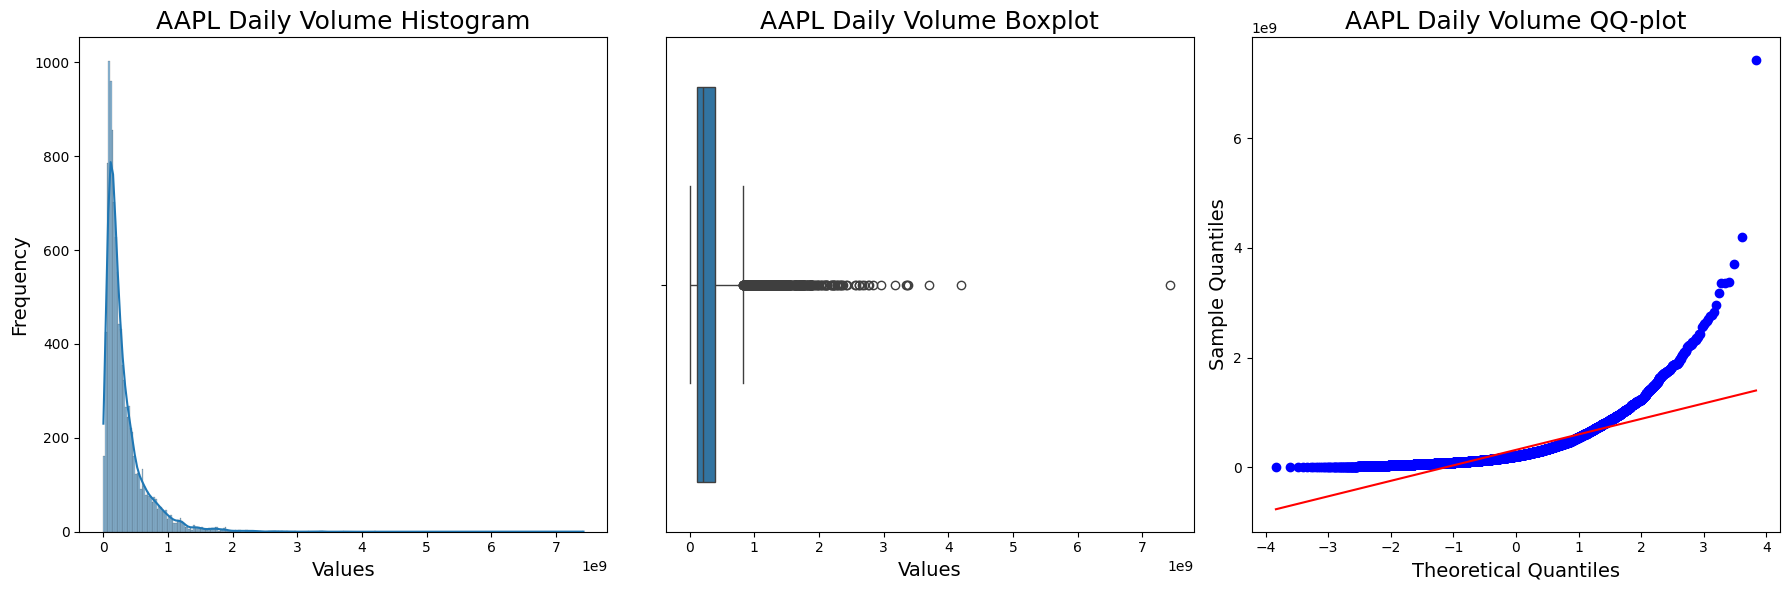

Normality Tests for AAPL Daily Volume

Shapiro-Wilk test: Statistic=0.7061599418420013, p-value=1.925425261324741e-87
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=440706.98896064225, p-value=0.0
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=807.779928676573
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

AAPL Daily Volume Sample Volatility (Standard Deviation): 353652711.33775157
AAPL Daily Volume Sample Skewness: 4.584340640100486
AAPL Daily Volume Sample Kurtosis: 54.4446726759753



In [ ]:
# analysis for AAPL daily volume

generate_plots(aapl_data, 'AAPL_Volume', 'AAPL Daily Volume')
normality_test(aapl_data, 'AAPL_Volume', 'AAPL Daily Volume')
get_sample_stat(aapl_data, 'AAPL_Volume', 'AAPL Daily Volume')

#### Describing the distribution
The three pictures show different respectives of apple's trading volume.
The first one shows the distribution daily trading frequency. The strongly right skewed distribution shows that AAPL is mainly traded on low volume with a much less frequent trading on high volume.\
The extremely narrowed boxplot also shows that AAPL is mainly trade on low volumn and with some outliers trading on high volume.\
The QQ-plot also shows there is a significant deviate of normal distribution which aligns with the previous two graphs.\
The three graphs all show a great skewness on trading volume of APPL, and this may due to its relatively high and fluctuate price.

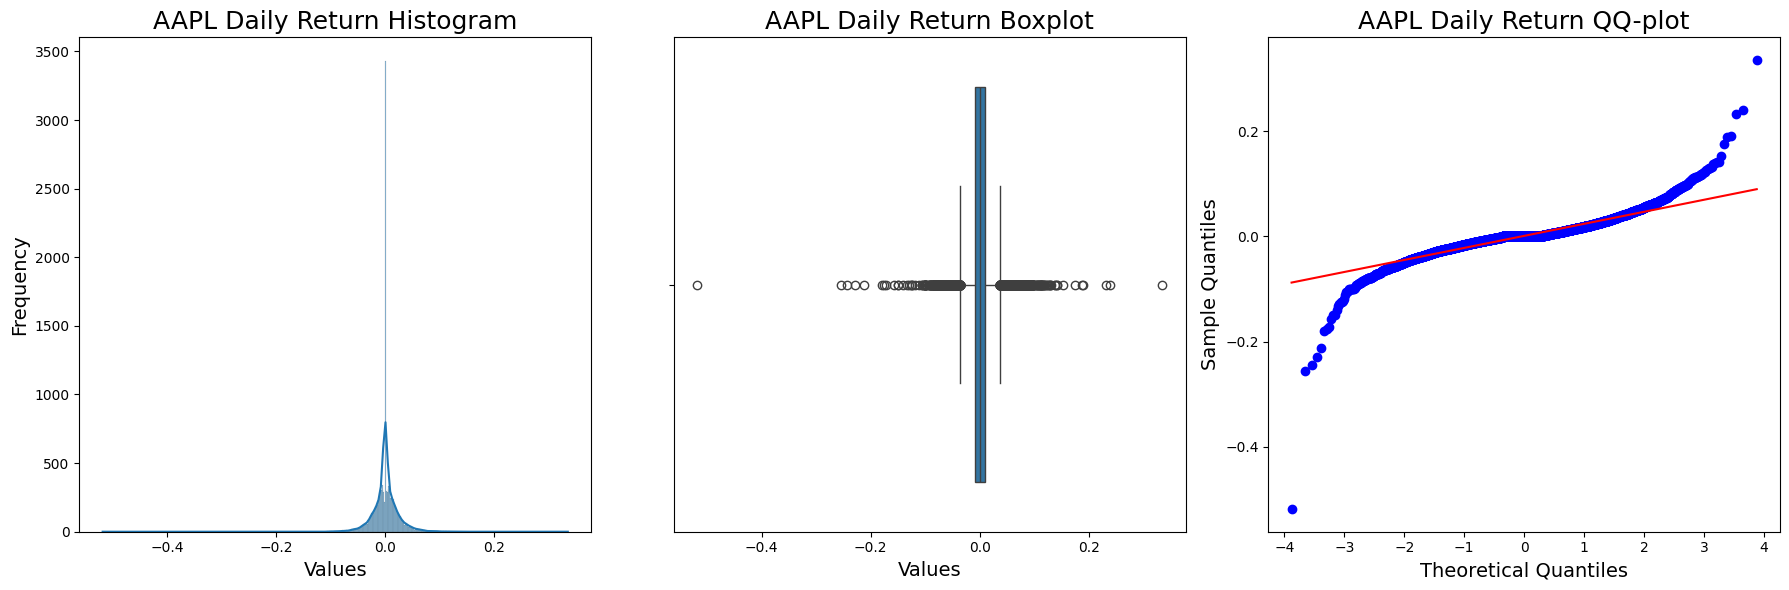

Normality Tests for AAPL Daily Return

Shapiro-Wilk test: Statistic=0.8660999457145562, p-value=2.585705808461348e-74
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=370068.84607246675, p-value=0.0
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=431.52703059742817
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

AAPL Daily Return Sample Volatility (Standard Deviation): 0.025841525649236044
AAPL Daily Return Sample Skewness: -1.6142988731628454
AAPL Daily Return Sample Kurtosis: 61.199045146713516



In [ ]:
# analysis for AAPL daily return

generate_plots(aapl_data, 'AAPL_Daily_Return', 'AAPL Daily Return')
normality_test(aapl_data, 'AAPL_Daily_Return', 'AAPL Daily Return')
get_sample_stat(aapl_data, 'AAPL_Daily_Return', 'AAPL Daily Return')

#### Describing the distribution

AAPL's daily returns appear symmetrical around 0 (likely slightly greater that that) with a sharp peak. The spread of daily returns appears greater than that of the S&P500, but it retains the strong left skew -- likely also due to black swan events or historically bad earnings reports. In fact, the largest single drop-off in a given day approached 0.5 (50% of the price). These are even bigger than the extremes seen in the S&P500.

The QQ-plot deviates from normality around the extremely low and high quantiles and the tests for normality all reject the null of a normal distribution.

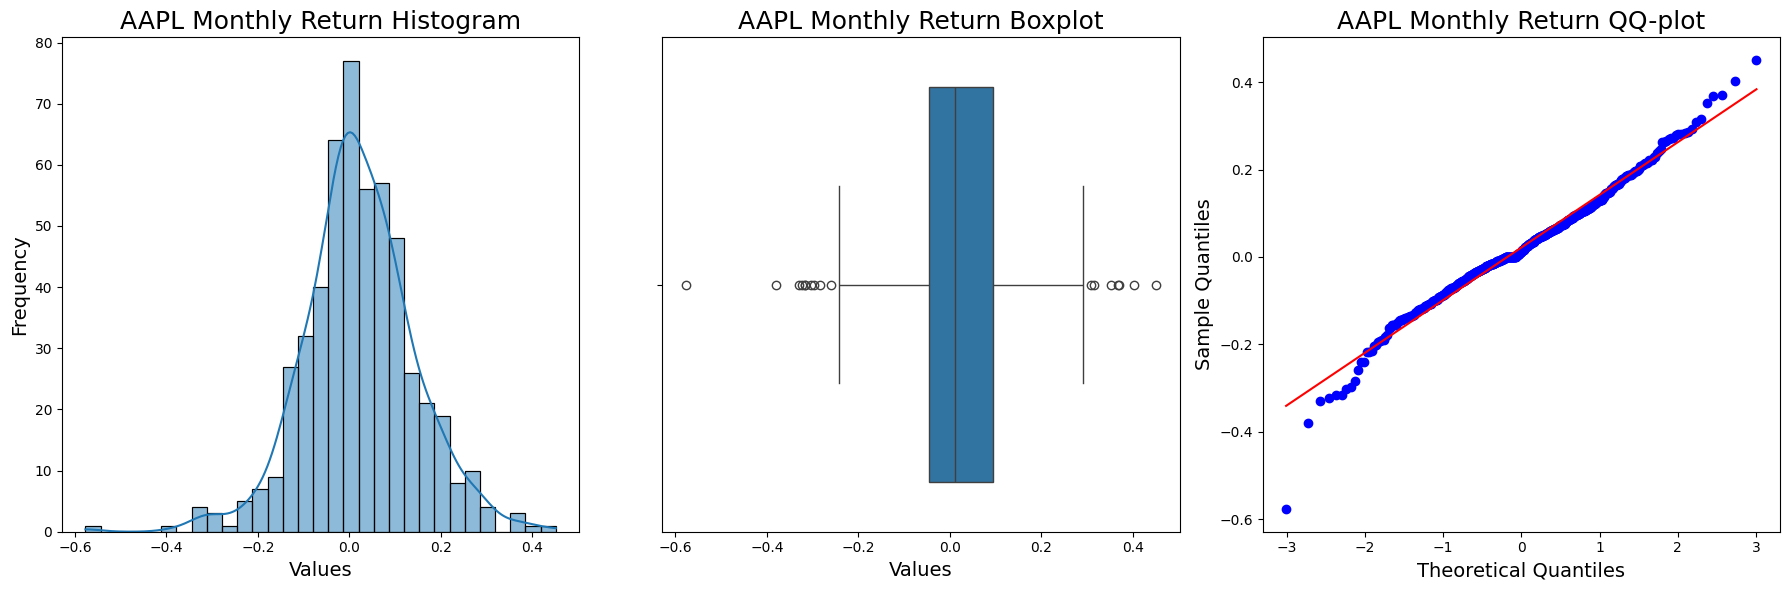

Normality Tests for AAPL Monthly Return

Shapiro-Wilk test: Statistic=0.9829655323340019, p-value=8.100772554097074e-06
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=62.815009068543695, p-value=2.2903090565332294e-14
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=1.9534885584686208
Critical values: [0.572 0.651 0.781 0.911 1.084]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

AAPL Monthly Return Sample Volatility (Standard Deviation): 0.11676471747327334
AAPL Monthly Return Sample Skewness: 0.18207341617375805
AAPL Monthly Return Sample Kurtosis: 1.1254056946036233



In [ ]:
# analysis for AAPL monthly return

generate_plots(aapl_monthly_returns, 'AAPL_Monthly_Return', 'AAPL Monthly Return')
normality_test(aapl_monthly_returns, 'AAPL_Monthly_Return', 'AAPL Monthly Return')
get_sample_stat(aapl_monthly_returns, 'AAPL_Monthly_Return', 'AAPL Monthly Return', 200)

#### Describing the distribution
The histogram reveals a nearly symmetrical, slightly right-skewed distribution of APPL monthly return. Most monthly returns fall between -0.1 and 0.2, and the histogram shows that small positive returns(0 - 0.2) are more common, but extreme negative returns(<-0.4) also occur occasionally.\
The boxplot also shows that most returns are concentrated around 0, but still some extreme positive and negative outliers\
The returns points nearly align with the red line which means that the monthly returns is very close to normal distribution but still have some outliers, and extreme negative outliers happened more frequently.\
The three graphs suggest the monthly return of APPL is normally distributed around 0 but with some outliers may due to huge market shocks or some black swan events that cause this abnormality.


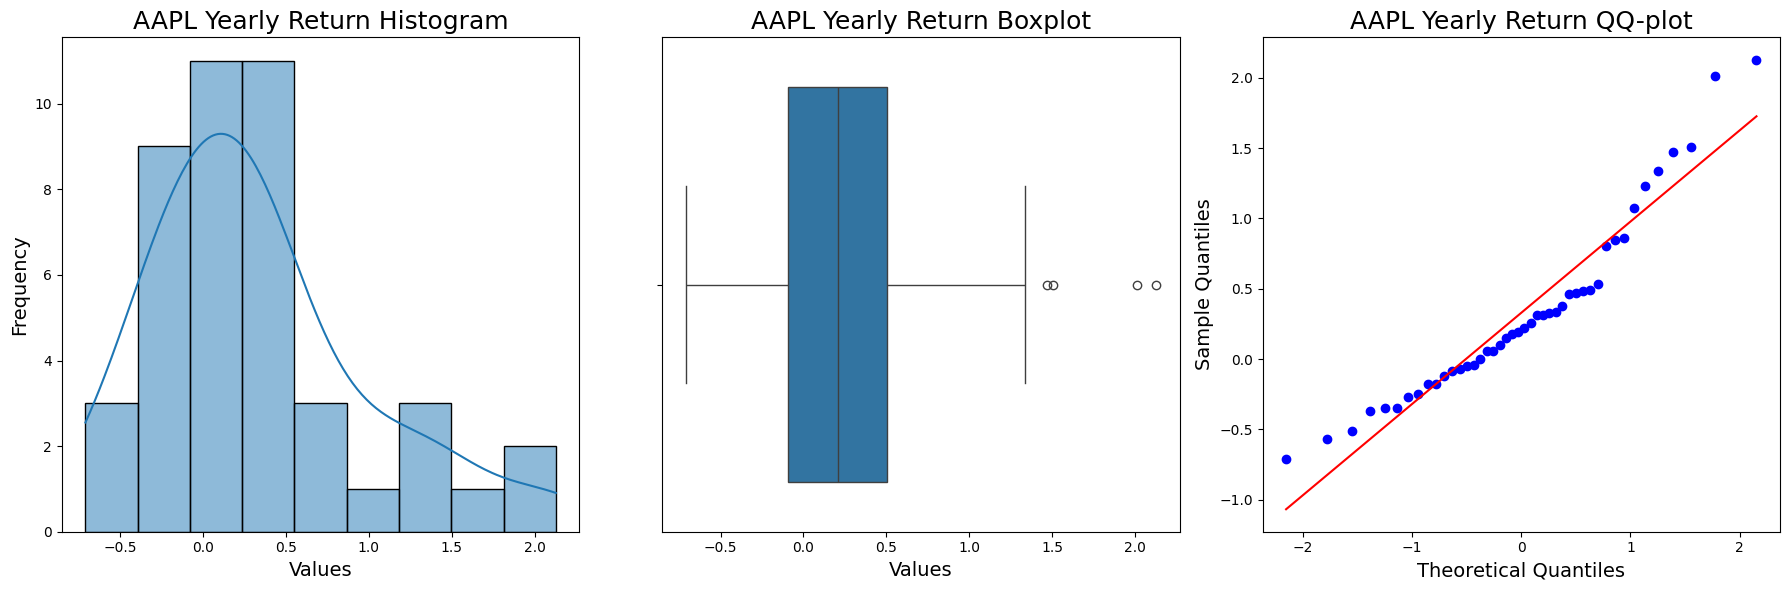

Normality Tests for AAPL Yearly Return

Shapiro-Wilk test: Statistic=0.9248793237608652, p-value=0.00695529818793691
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=7.7514202035231, p-value=0.020739605413207962
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=1.097718497495471
Critical values: [0.534 0.609 0.73  0.852 1.013]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

AAPL Yearly Return Sample Volatility (Standard Deviation): 0.6115978746822187
AAPL Yearly Return Sample Skewness: 1.0319931327013223
AAPL Yearly Return Sample Kurtosis: 1.1839147586327332



In [ ]:
# analysis for AAPL yearly return

generate_plots(aapl_yearly_returns, 'AAPL_Yearly_Return', 'AAPL Yearly Return')
normality_test(aapl_yearly_returns, 'AAPL_Yearly_Return', 'AAPL Yearly Return')
get_sample_stat(aapl_yearly_returns, 'AAPL_Yearly_Return', 'AAPL Yearly Return', 30)

#### Describing the distribution

The Histogram shows a roughly symmetrical distibution with a light right skewness, which means that the yearly return of APPL mostly around (-0.2 - 0.5) but with some extremely positive and negative returns.\
The boxplot also shows that the yearly returns of APPL are more concentrated on small positive returns.\
The QQ-plot shows the yearly returns of APPL roughly follow with the red line, but with some outliers on two tails.\
These trends suggested APPL shows high investors' confidence and always generate positive returns, but still have some extent of fluctuation.

### Analysis for TSLA

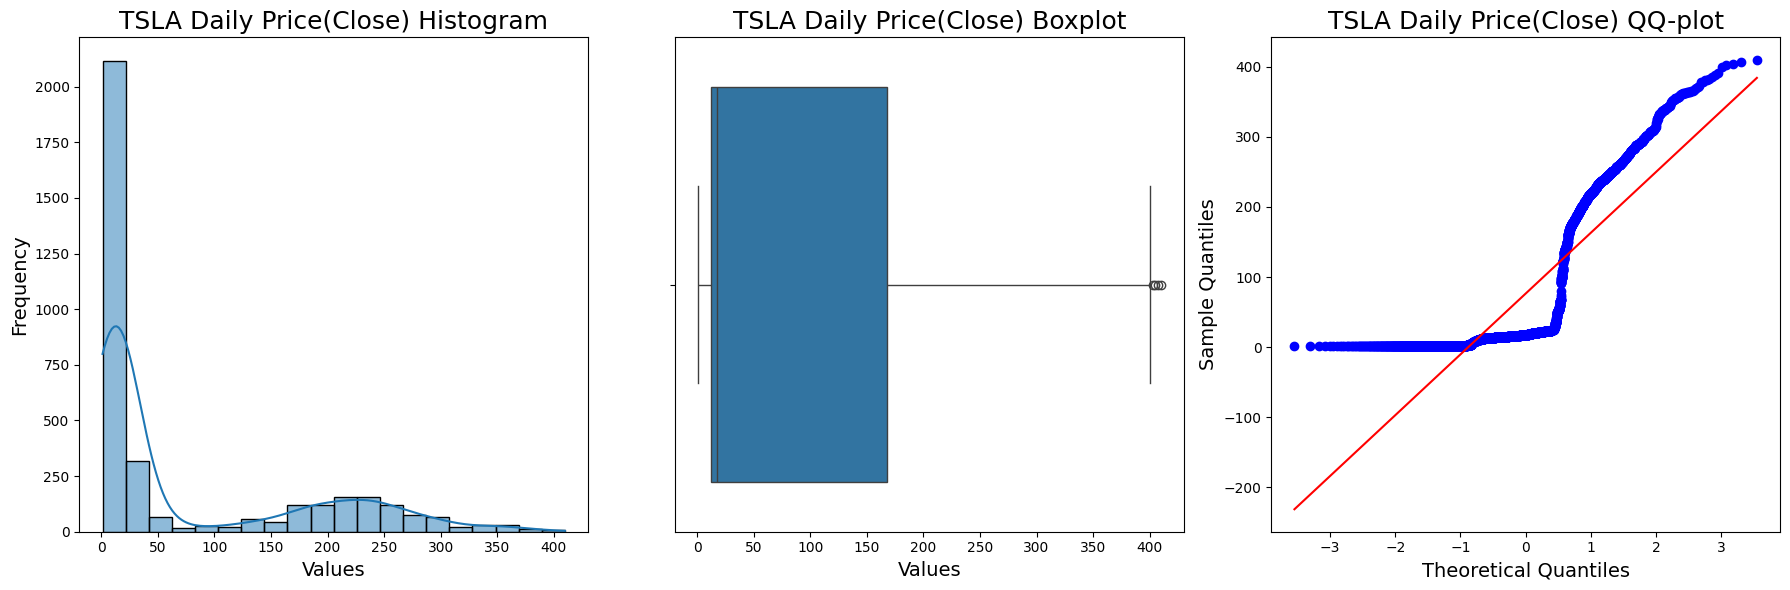

Normality Tests for TSLA Daily Price(Close)

Shapiro-Wilk test: Statistic=0.7110249309128505, p-value=1.4386009279288234e-61
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=880.8746139825286, p-value=5.254216323870704e-192
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=484.1747785666248
Critical values: [0.575 0.655 0.786 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

TSLA Daily Price(Close) Sample Volatility (Standard Deviation): 102.55871844742362
TSLA Daily Price(Close) Sample Skewness: 1.2193018646115532
TSLA Daily Price(Close) Sample Kurtosis: 0.0050298037352902725



In [ ]:
# analysis for TSLA daily price

generate_plots(tsla_data, 'TSLA_Price', 'TSLA Daily Price(Close)')
normality_test(tsla_data, 'TSLA_Price', 'TSLA Daily Price(Close)')
get_sample_stat(tsla_data, 'TSLA_Price', 'TSLA Daily Price(Close)')

#### Describing the distribution

The histogram shows a extremely right-skewed distibution which means that the the most of the daily price of TSLA concentrated on 0 - 30, but with a wide range of higher price from 100 - 400.\
The boxplot also shows the very wide range of daily prices of TSLA which suggested TSLA may experienced a continuous price increaes due to high demand new products and a high market share.\
The QQ-plot shows that the daily price of TSLA heavily deviates the red line which also reveals a high skewness.

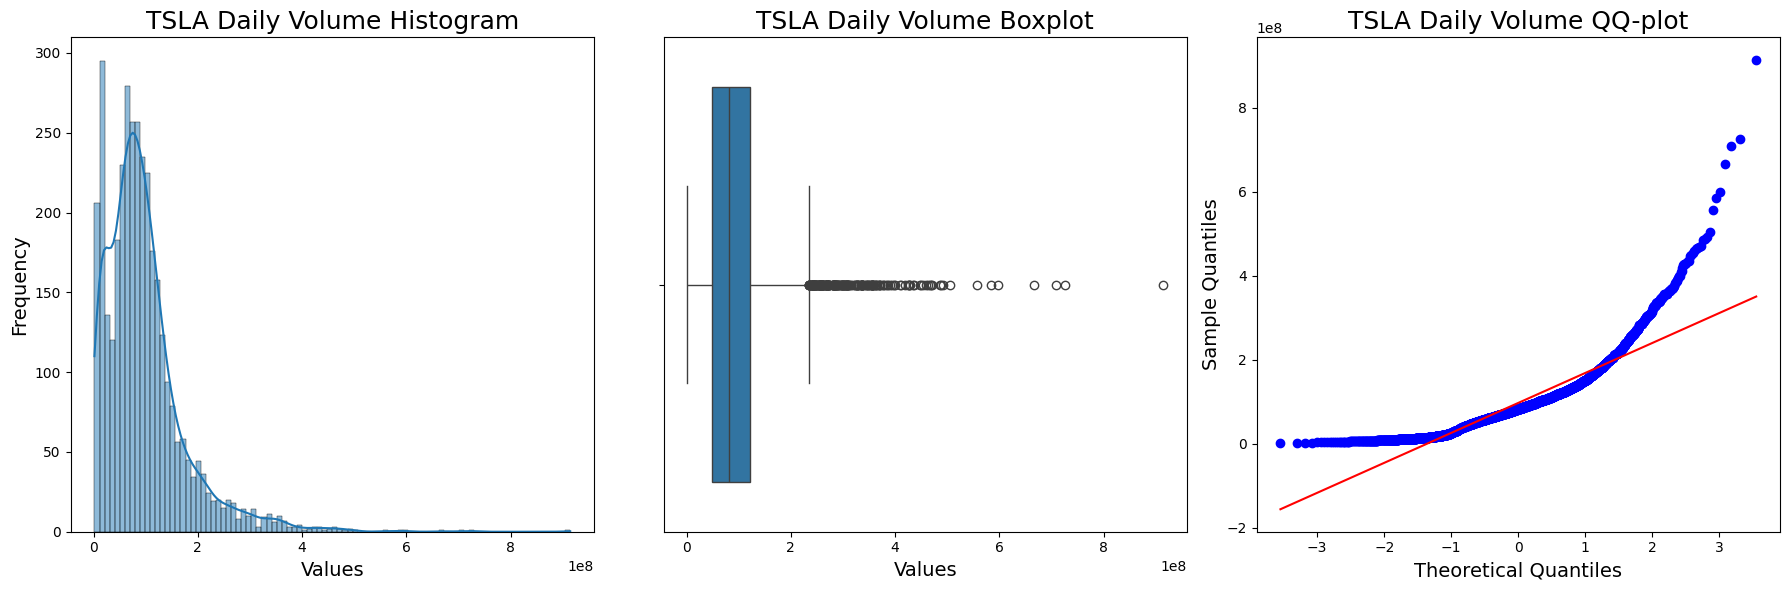

Normality Tests for TSLA Daily Volume

Shapiro-Wilk test: Statistic=0.8276302211936696, p-value=2.6826595746718498e-52
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=18485.202280147136, p-value=0.0
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=119.28400545233035
Critical values: [0.575 0.655 0.786 0.917 1.091]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

TSLA Daily Volume Sample Volatility (Standard Deviation): 78391019.68459108
TSLA Daily Volume Sample Skewness: 2.297462864087737
TSLA Daily Volume Sample Kurtosis: 10.22673218523997



In [ ]:
generate_plots(tsla_data, 'TSLA_Volume', 'TSLA Daily Volume')
normality_test(tsla_data, 'TSLA_Volume', 'TSLA Daily Volume')
get_sample_stat(tsla_data, 'TSLA_Volume', 'TSLA Daily Volume')

#### Describing the distribution
The histogram shows a right skewness of daily volume of TSLA, which means TSLA is mainly traded on low volume, but still with some outliers on high volume trading.\
The boxplot shows that there is a wide range of several high volume trading of TSLA.\
The QQ-plot shows that the daily volume of TSLA basiclly follow red line but heavily deviate on the two tails.\
The skewness shows that although TSLA mainly traded on low volume there are still some high-volume trading, since TSLA exhibits a high and strong tendency of appreciation.

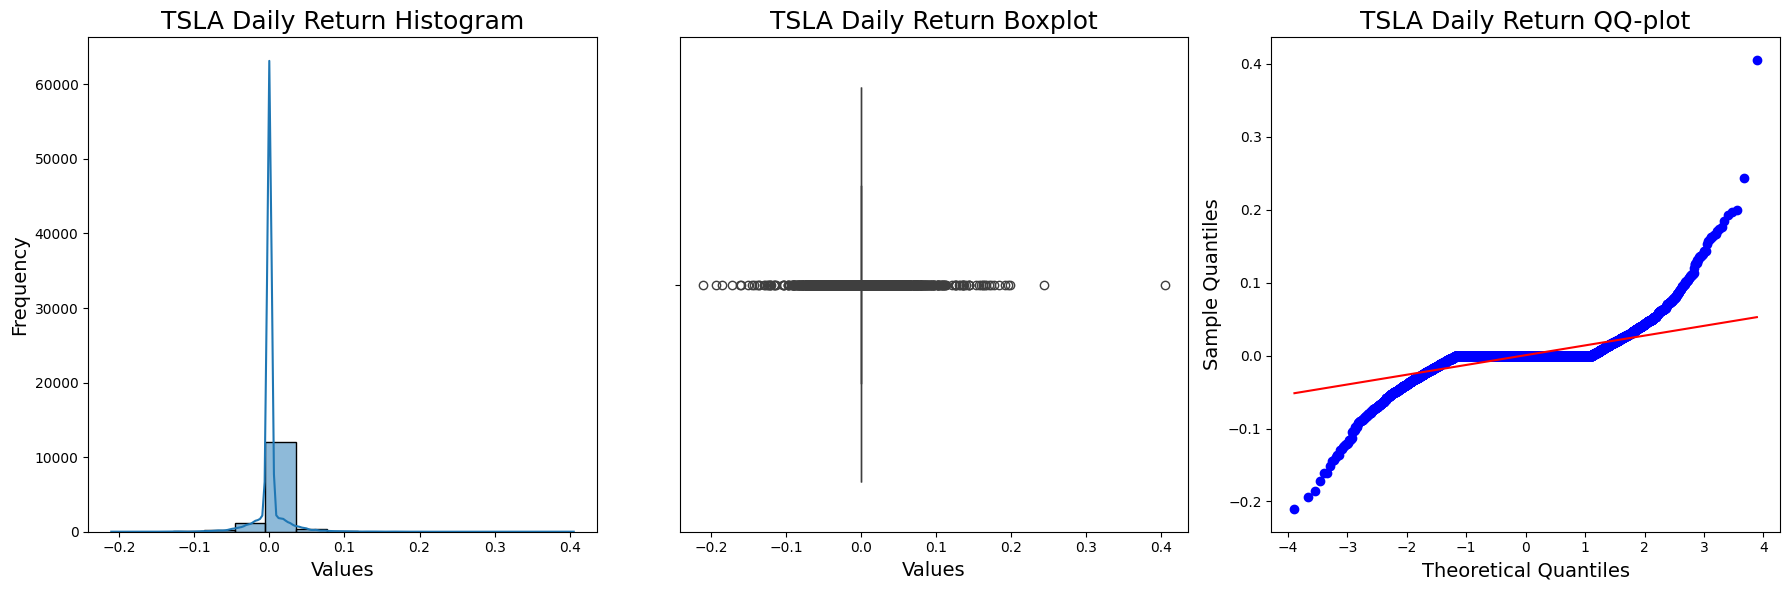

Normality Tests for TSLA Daily Return

Shapiro-Wilk test: Statistic=0.5196860355478525, p-value=3.768813442025641e-105
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=992757.6477203442, p-value=0.0
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=2657.6084050797363
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

TSLA Daily Return Sample Volatility (Standard Deviation): 0.02016922498566341
TSLA Daily Return Sample Skewness: 3.006509985264856
TSLA Daily Return Sample Kurtosis: 68.76716503777584



In [ ]:
# analysis for TSLA daily return

generate_plots(tsla_data, 'TSLA_Daily_Return', 'TSLA Daily Return')
normality_test(tsla_data, 'TSLA_Daily_Return', 'TSLA Daily Return')
get_sample_stat(tsla_data, 'TSLA_Daily_Return', 'TSLA Daily Return')


#### Describing the distribution
The histogram shows a nearly symmetrical and concentrated distribution of daily returns of TSLA, which means that it mainly concentrated around 0.\
The extremely narrow boxplot also shows the range of daily retrun of TSLA is limit, which means that the return of TSLA is relatively stable due to its strong product demands, but there are still some outliers.\
The QQ-plot also shows that TSLA daily retruns still have some extremely positive and negative outliers due to some suddent events or market fluctuations.

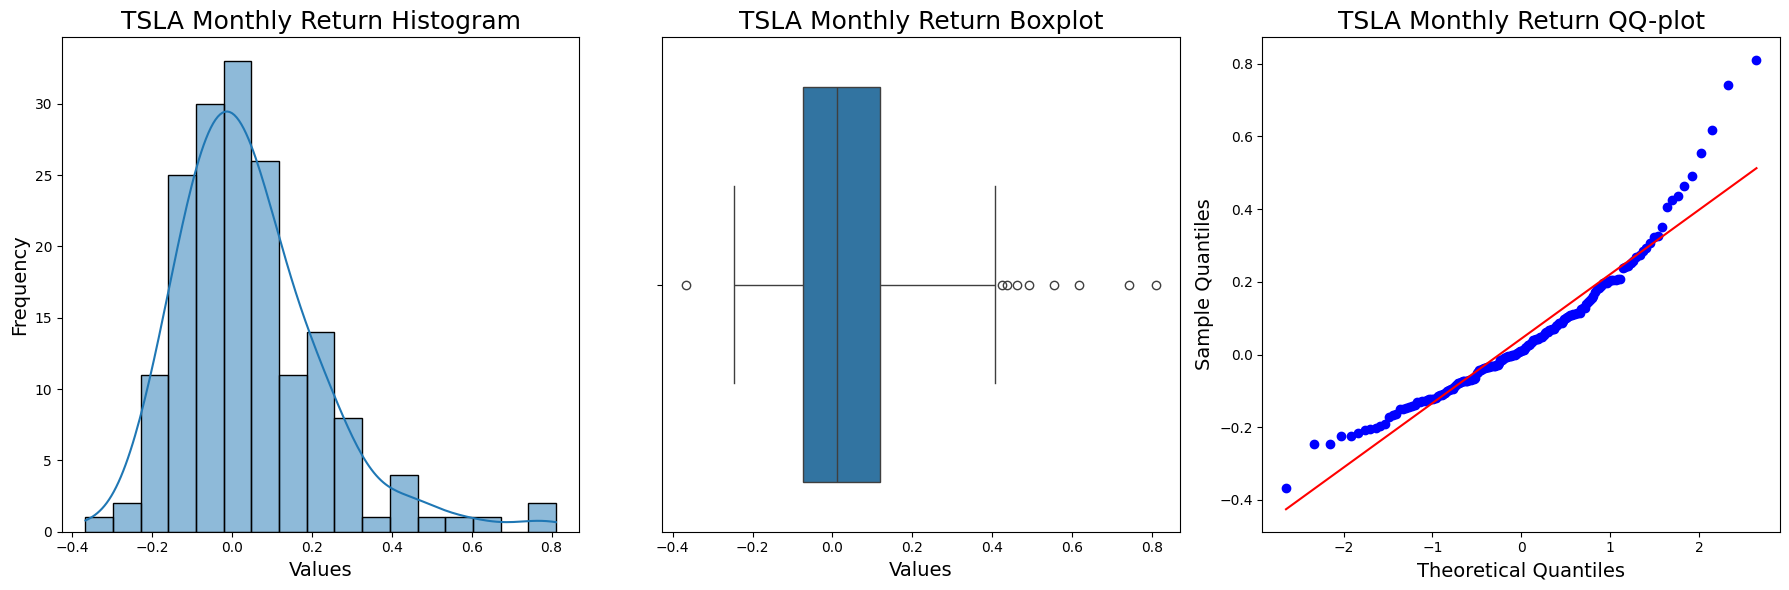

Normality Tests for TSLA Monthly Return

Shapiro-Wilk test: Statistic=0.9280708544272981, p-value=1.6393191013104175e-07
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=92.4953727052704, p-value=8.220249819227268e-21
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=2.64224395625331
Critical values: [0.563 0.642 0.77  0.898 1.068]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

TSLA Monthly Return Sample Volatility (Standard Deviation): 0.17310428441232237
TSLA Monthly Return Sample Skewness: 0.981125110350923
TSLA Monthly Return Sample Kurtosis: 0.8746102156716287



In [ ]:
# analysis for TSLA monthly return

generate_plots(tsla_monthly_returns, 'TSLA_Monthly_Return', 'TSLA Monthly Return')
normality_test(tsla_monthly_returns, 'TSLA_Monthly_Return', 'TSLA Monthly Return')
get_sample_stat(tsla_monthly_returns, 'TSLA_Monthly_Return', 'TSLA Monthly Return', 100)

#### Describing the distribution
The histogram shows a approximately symmetrical distribution of monthly return of TSLA, which indicates the most monthly returns concentrated on -0.1 - 0.1, and with more frequent higher positive monthly returns than lower neagtive monthly returns.\
The boxplot also shows a wider range of higher positive monthly returns and a more frequent positive outliers.\
The QQ-plot shows the monthly return of TSLA roughly align with the red line, but still have some extreme returns on the two tails. The positive returns shows more extreme and frequent than negative returns.\
These shows that TSLA has a very table and highly-potential positive returns.

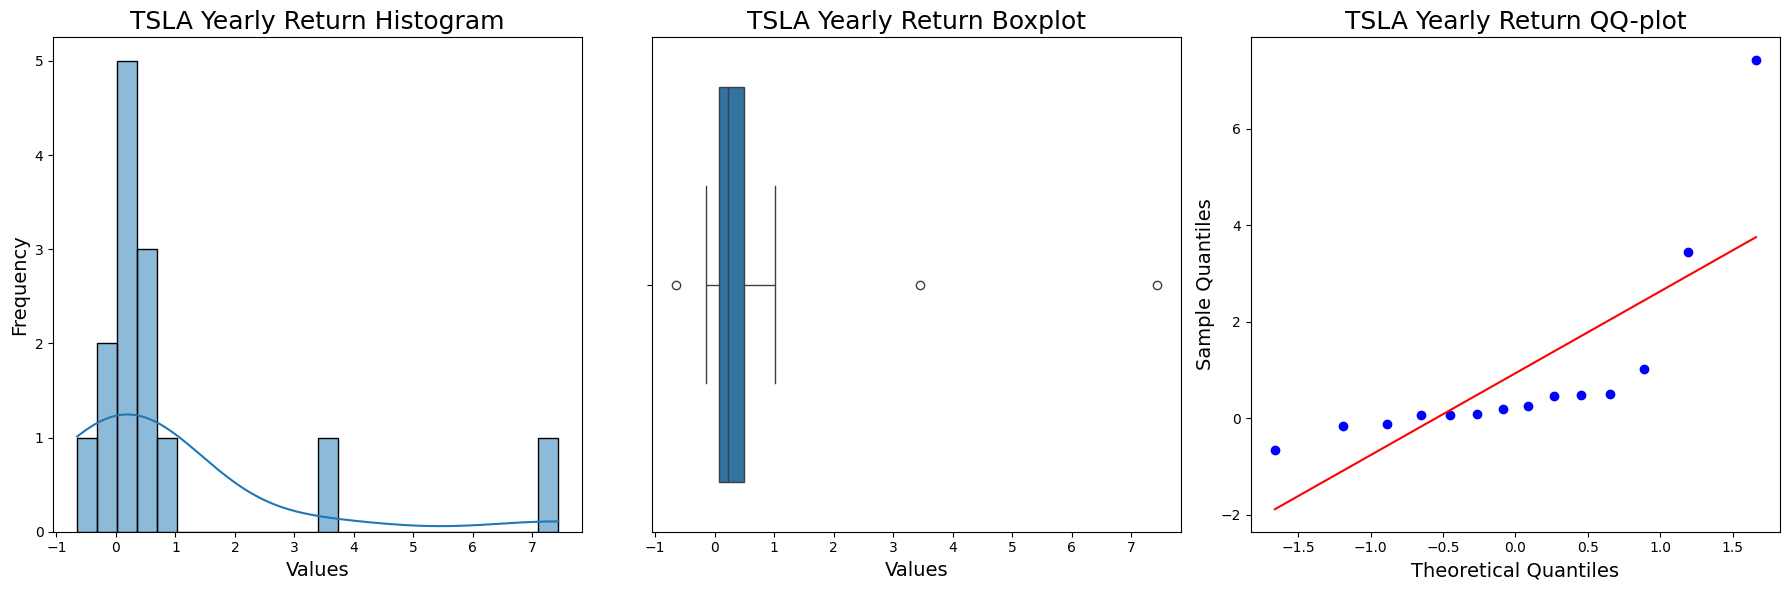

Normality Tests for TSLA Yearly Return

Shapiro-Wilk test: Statistic=0.6027468181922241, p-value=4.291481429946105e-05
Result: Reject the null hypothesis (data is not normally distributed)

Jarque-Bera test: Statistic=27.56752612268008, p-value=1.0322568240623242e-06
Result: Reject the null hypothesis (data is not normally distributed)

Anderson-Darling test: Statistic=2.3553754782149383
Critical values: [0.497 0.566 0.68  0.793 0.943]
Significance levels: [15.  10.   5.   2.5  1. ]
Result: Reject the null hypothesis at 5% significance (data is not normally distributed)

TSLA Yearly Return Sample Volatility (Standard Deviation): 2.351980465150077
TSLA Yearly Return Sample Skewness: 1.881796169373811
TSLA Yearly Return Sample Kurtosis: 2.2283137805524484



In [ ]:
# analysis for TSLA yearly return

generate_plots(tsla_yearly_returns, 'TSLA_Yearly_Return', 'TSLA Yearly Return')
normality_test(tsla_yearly_returns, 'TSLA_Yearly_Return', 'TSLA Yearly Return')
get_sample_stat(tsla_yearly_returns, 'TSLA_Yearly_Return', 'TSLA Yearly Return', 10)

#### Describing the distribution
The histogram exhibits a highly right-skewed distribution of yearly returns of TSLA, which indicates that the returns mainly concentrated on 0 - 1. It also shows a strong and stable indicator of positive returns.\
The boxplot also shows that there are a wider postive yearly returns of TSLA, with also a higher frequency of extreme positive yearly returns.\
The yearly returns of TSLA deviates from the red line, and with a extreme positive yearly returns than expected. It shows that TSLA performed very well on some years, but still subject to some good or bad events that will strongly affect its performances.

## Part 1-2
Using volatility as an example, can you graphically demonstrate the relationship as you move from population to rolling 1 year, rolling 90 day, rolling 30 day, etc. Can you describe the relationship between the statistic and time scale?  Which do you think is the more useful metric (no right answer).

**682:** Perform the analysis above for 2 of the top 10 constituents of the S&P 500 and the overall S&P 500

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_rolling_volatility(data, date_col, return_col, windows, title_prefix):
    # Calculate population volatility
    population_volatility = data[return_col].std()

    plt.figure(figsize=(12, 6))

    # Plot population volatility as a horizontal line
    plt.axhline(population_volatility, color='red', linestyle='--', label=f'{title_prefix} Population Volatility')

    # Calculate and plot rolling volatilities for each window size
    for window in windows:
        rolling_volatility = data[return_col].rolling(window=window).std()
        plt.plot(data[date_col], rolling_volatility, label=f'Rolling Volatility ({window} days)')

    # Plot configurations
    plt.title(f'{title_prefix} Volatility Across Different Time Scales')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()



### Analysis for SPX

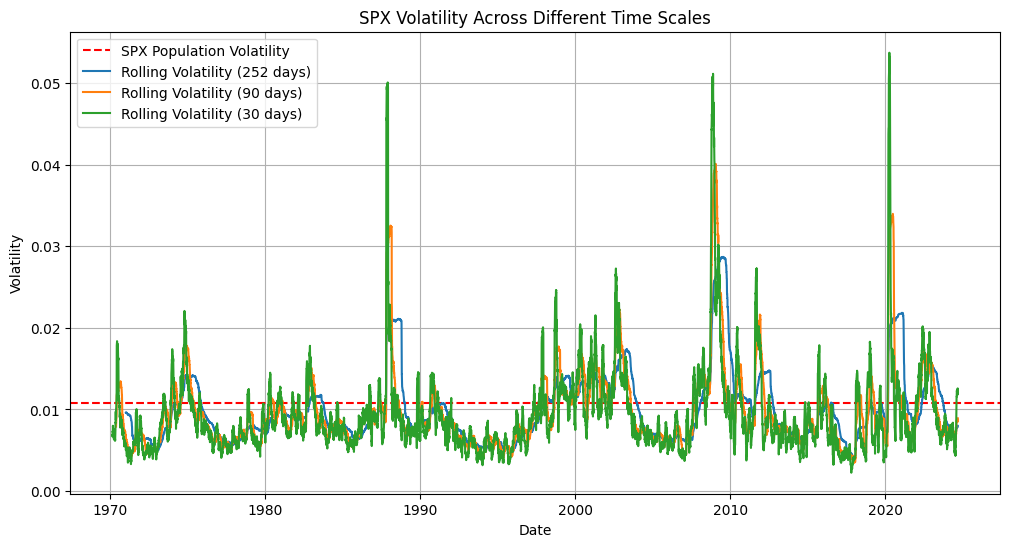

In [ ]:
plot_rolling_volatility(spx_data, 'Date_SPX', 'SPX_Daily_Return', windows=[252, 90, 30], title_prefix='SPX')

### Analysis for AAPL

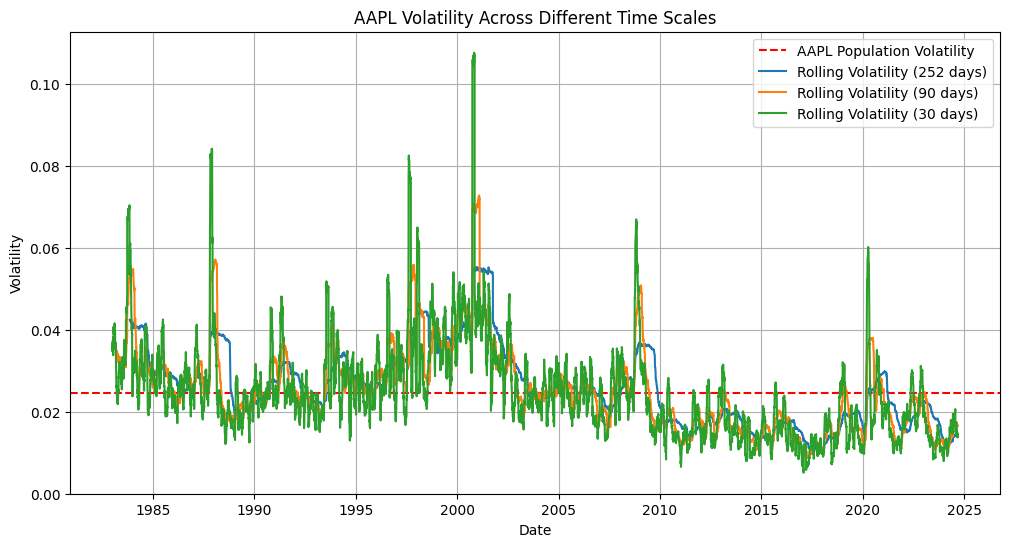

In [ ]:
plot_rolling_volatility(aapl_data, 'Date_AAPL', 'AAPL_Daily_Return', windows=[252, 90, 30], title_prefix='AAPL')

### Analysis for TSLA

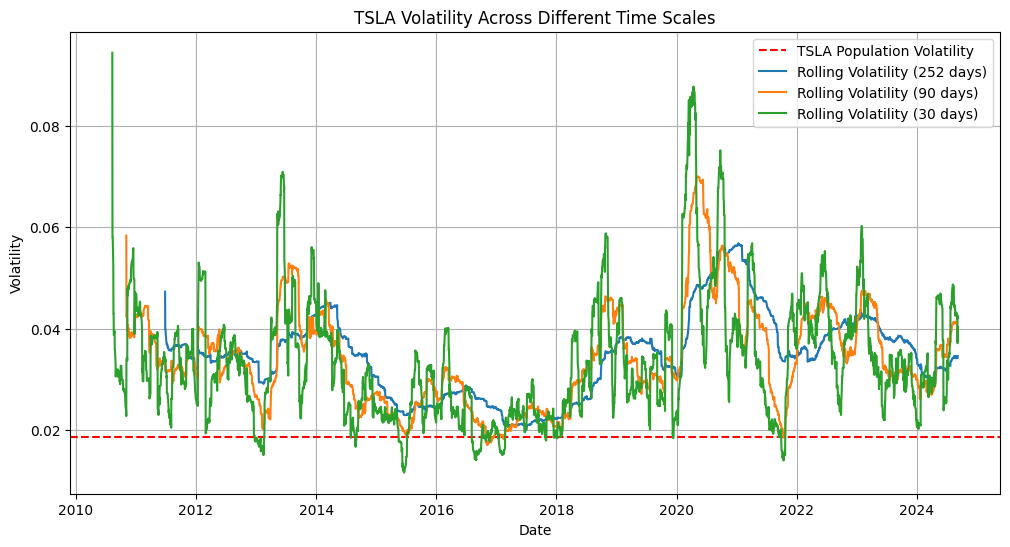

In [ ]:
plot_rolling_volatility(tsla_data, 'Date_TSLA', 'TSLA_Daily_Return', windows=[252, 90, 30], title_prefix='TSLA')

### Describing the relationship between the statistic and time scale?  Which do you think is the more useful metric (no right answer). include all 3 stock

The plot of the stocks rolling volatility directly depends on the time scale as the wider (longer) the time scale, the "smoother". In essence it looks that using rolling volatility seems to reduce the noise in the data, where as a longer time scale for the rolling volatility means a larger reduction in noise, or a smoother plot.

I think the most useful metric really depends on your goals. For example, if you are a delta nuetral trader you would want to focus on rolling volatility with a smaller window (if you use rolling volatility at all), therefore you can capture the noise and volatility. If you're long on an equity, it might be more beneficial to look at rolling volatility on a larger time scale so that you can look past the noise of day-to-day trading and focus more on the trends more pertinant to your time period. For example, someone looking for a longer (12+ months) would find the 252 day rolling volatility line more helpful.




## Part 1-3

Create a graph that displays the risk/reward profile
- A scatter plot with the average daily return vs. the standard deviation of the daily returns for all 10 of the Top 10 constituents of the S&P 500 and the S&P 500.


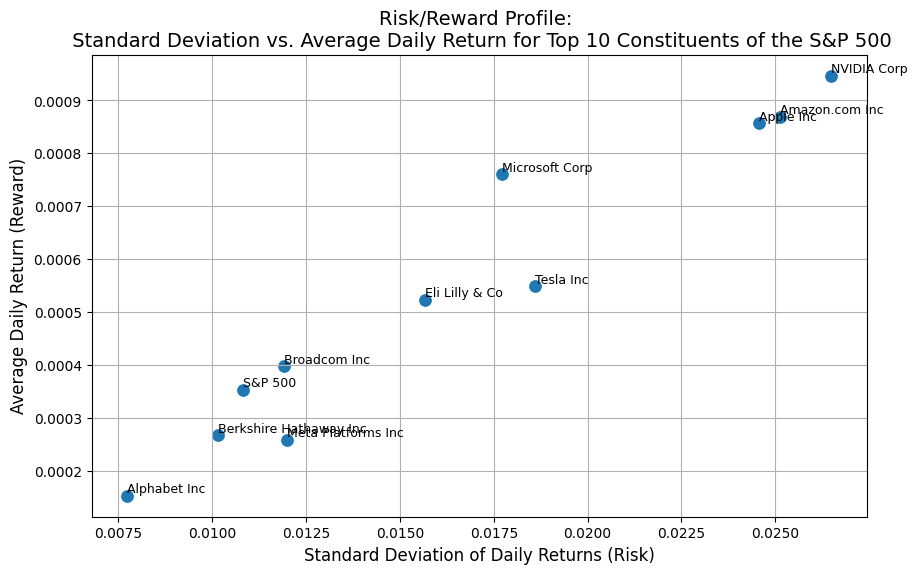

In [ ]:
# Map tock symbols to full company names
company_names = {
    'AAPL_Price': 'Apple Inc',
    'MSFT_Price': 'Microsoft Corp',
    'NVDA_Price': 'NVIDIA Corp',
    'GOOG_Price': 'Alphabet Inc',
    'AMZN_Price': 'Amazon.com Inc',
    'META_Price': 'Meta Platforms Inc',
    'BRK/BPrice': 'Berkshire Hathaway Inc',
    'LLY_Price': 'Eli Lilly & Co',
    'TSLA_Price': 'Tesla Inc',
    'AVGO_Price': 'Broadcom Inc',
    'SPX_Price': 'S&P 500'
}

# Extract relevant columns
price_columns = ['AAPL_Price', 'MSFT_Price', 'NVDA_Price', 'GOOG_Price', 'AMZN_Price',
                 'META_Price', 'BRK/BPrice', 'LLY_Price', 'TSLA_Price', 'AVGO_Price', 'SPX_Price']

# Extract the price data
prices = sp500_data_clean[price_columns].astype(float)

# Calculate daily returns
# please note that pct_change fills missing values with previous value
daily_returns = prices.pct_change()

# average return and standard deviation of returns
summary_stats = daily_returns.agg(['mean', 'std']).transpose().reset_index()
summary_stats.columns = ['Stock', 'avg_return', 'sd_return']

# Plotting the scatter plot with risk on the X-axis and reward on the Y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=summary_stats, x='sd_return', y='avg_return', s=100)

# Adding labels to the points using the full company names
for i in range(summary_stats.shape[0]):
    company_name = company_names.get(summary_stats['Stock'][i], summary_stats['Stock'][i])
    plt.text(summary_stats['sd_return'][i],
             summary_stats['avg_return'][i],
             company_name, fontsize=9, verticalalignment='bottom')

# Adding plot titles and labels with the correct risk/reward axis labels
plt.title('Risk/Reward Profile: \n Standard Deviation vs. Average Daily Return for Top 10 Constituents of the S&P 500', fontsize=14)
plt.xlabel('Standard Deviation of Daily Returns (Risk)', fontsize=12)
plt.ylabel('Average Daily Return (Reward)', fontsize=12)

plt.grid(True)
plt.show()

We can see that there is a strong correlation between standard deviation of returns and daily return, suggesting with additional volatility there is an increased chance of greater profits.

## Part 1-4

Calculate and display graphically the monthly correlation (correlation calculated for one month of data) between the daily net return of the one constituent you selected and the overall S&P 500 over time.
- You can use a rolling window of 30 days (or 21 if you want to go with the average number of trading days in a month) on daily data.  You don't have to calculate using calendar months

(Hint) Use a rolling window function like a rolling average but with correlation  


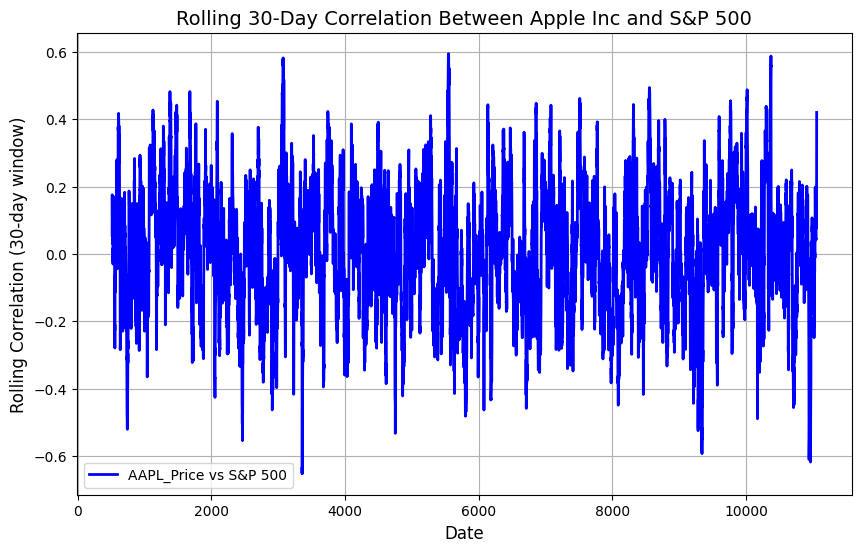

In [ ]:
# chosen stock and rolling_window
chosen_stock = 'AAPL_Price'
rolling_window = 30

# Use a 30-day rolling window to calculate the correlation between the chosen stock and S&P 500
rolling_corr = daily_returns[chosen_stock].rolling(window=rolling_window).corr(daily_returns['SPX_Price'])

# Plotting the rolling correlation over time
plt.figure(figsize=(10, 6))
rolling_corr.plot(color='blue', label=f'{chosen_stock} vs S&P 500', linewidth=2)

# Adding plot titles and labels
plt.title(f'Rolling {rolling_window}-Day Correlation Between {company_names[chosen_stock]} and S&P 500', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel(f'Rolling Correlation ({rolling_window}-day window)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

## Part 1-5
Perform Kernel Density Estimation for the daily net returns of the S&P 500 and describe the relevant properties of the distribution.

**682:** Perform Kernel Density Estimation for the daily, monthly, and yearly net returns of the S&P 500 and describe the relevant properties of the distributions.


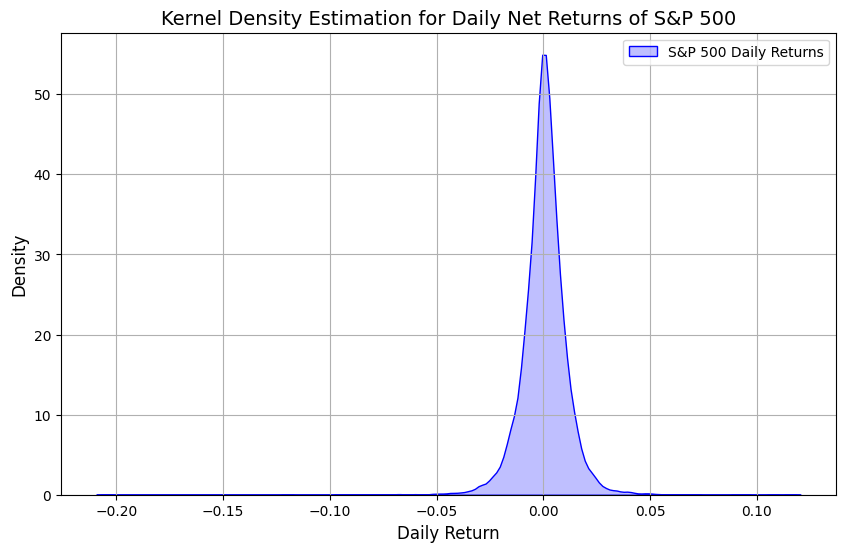

Mean for Daily Returns: 0.0003530925401784479
Skewness for Daily Returns: -0.6087807679224403
Kurtosis for Daily Returns: 18.5858298331044


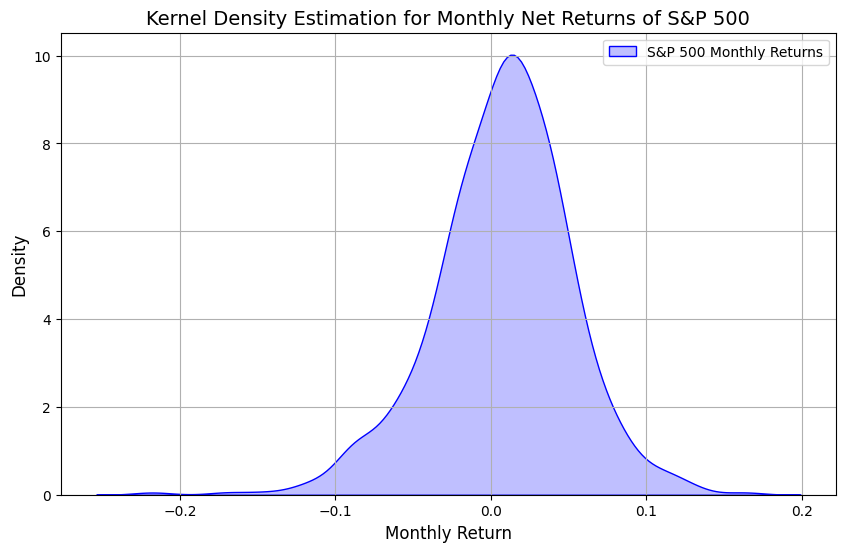

Mean for Monthly Returns: 0.007336746984877277
Skewness for Monthly Returns: -0.4459018326805865
Kurtosis for Monthly Returns: 1.6064975294024153


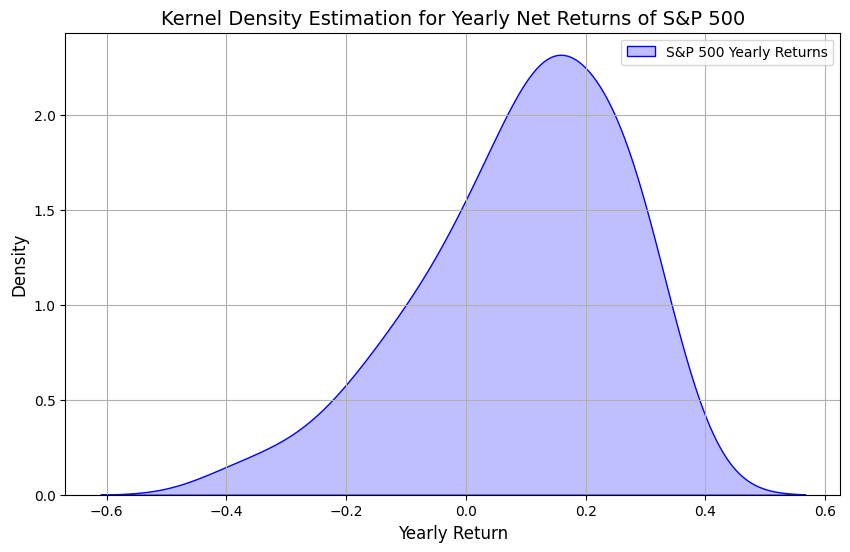

Mean for Yearly Returns: 0.09233971306871223
Skewness for Yearly Returns: -0.7779551503963402
Kurtosis for Yearly Returns: 0.12427668601946262


In [ ]:
def plot_kde_and_stats(data, column_name, period_name):
    # Plot Kernel Density Estimation (KDE)
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data[column_name].dropna(), bw_adjust=1, fill=True, color='blue', label=f'S&P 500 {period_name.capitalize()} Returns')

    # Adding plot titles and labels
    plt.title(f'Kernel Density Estimation for {period_name.capitalize()} Net Returns of S&P 500', fontsize=14)
    plt.xlabel(f'{period_name.capitalize()} Return', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

    # Calculate and print skewness and kurtosis
    data_skewness = skew(data[column_name].dropna())
    data_kurtosis = kurtosis(data[column_name].dropna())

    print(f'Mean for {period_name.capitalize()} Returns: {data[column_name].mean()}')

    print(f'Skewness for {period_name.capitalize()} Returns: {data_skewness}')
    print(f'Kurtosis for {period_name.capitalize()} Returns: {data_kurtosis}')


plot_kde_and_stats(daily_returns, 'SPX_Price', period_name='daily')
plot_kde_and_stats(spx_monthly_returns, 'SPX_Monthly_Return', period_name='monthly')
plot_kde_and_stats(spx_yearly_returns, 'SPX_Yearly_Return', period_name='yearly')

### Describing the relevant properties of the distribution, include daily, monthly and yearly:

The **daily return** KDE distribution is highly peaked and narrow around 0 (the true value is 0.004). This mean correlates to an average daily return of 0.4% or 40 bips. The negative Fisher-Pearson skewness coefficient of -0.61 tells us that the distribution is *slightly* left skewed, implying that there are slightly more extreme negative values for daily returns than there are extreme positive positive valyes. The high density of the KDE fixed around the mean tells us that there most daily returns are clustered around the 0, and that there are few extreme values. The me


The **monthly return** KDE distribution is broader that the daily returns, telling us there is more variability in the monthly returns, with the distribution centererd around a mean of 0.007. The negative Fisher-Pearson skewness coefficient of -0.44 tells us that the distribution is *very slightly* left skewed, and like the daily returns plot. We can see from this plot that monthly returns have a greater spread and greater variability than the daily returns, as well as the monthly returns are learning farther to the right of 0, meaning there are porportionally more months with positive returns with respect to negative returns.

The **yearly returns** show the greatest variablity with the widest distribution. The mean is centered around 0.092, representing a mean yearly return of 920 bips of 9.2%. The distribution has a slight positive skew that is more defined than the daily and monthly plots. This means that there have been more positive returns than negative returns, but there are more extreme outliers in the negative direction.



## Part 1-6
Test daily net returns for autocorrelation using the autocorrelation function for 1 of the top 10 constituents of the S&P 500 and the overall S&P 500.  Describe what insight this analysis provides for this series.  


**682:** Perform the analysis above for 2 of the top 10 constituents of the S&P 500 and the overall S&P 500

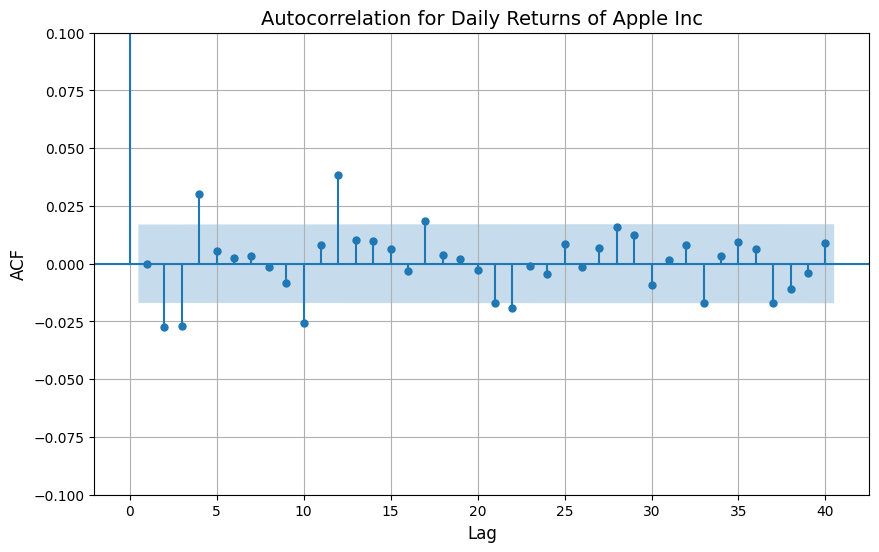

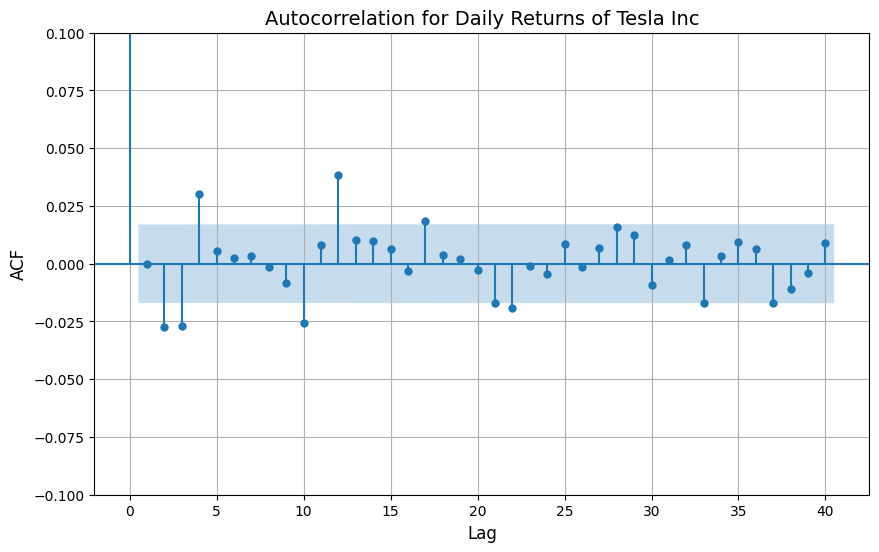

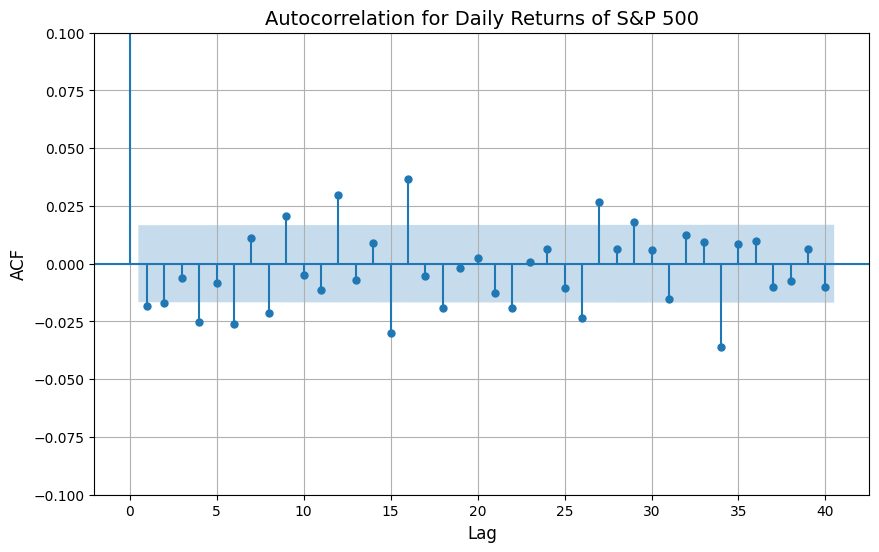

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

chosen_stock1 = 'AAPL_Price'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ACF for the chosen stock
plot_acf(daily_returns[chosen_stock].dropna(), lags=40, ax=ax, alpha=0.05)

# Customize the plot to match R's ggAcf style
ax.set_title(f'Autocorrelation for Daily Returns of {company_names[chosen_stock1]}', fontsize=14)
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('ACF', fontsize=12)
ax.set_ylim([-0.1, 0.1])
ax.grid(True)

# Display the plot
plt.show()

chosen_stock2 = 'TSLA_Price'

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ACF for the chosen stock
plot_acf(daily_returns[chosen_stock].dropna(), lags=40, ax=ax, alpha=0.05)

# Customize the plot to match R's ggAcf style
ax.set_title(f'Autocorrelation for Daily Returns of {company_names[chosen_stock2]}', fontsize=14)
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('ACF', fontsize=12)
ax.set_ylim([-0.1, 0.1])
ax.grid(True)

# Display the plot
plt.show()

# Create another plot for S&P 500
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the ACF for S&P 500
plot_acf(daily_returns['SPX_Price'].dropna(), lags=40, ax=ax, alpha=0.05)

# Customize the plot
ax.set_title('Autocorrelation for Daily Returns of S&P 500', fontsize=14)
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('ACF', fontsize=12)
ax.set_ylim([-0.1, 0.1])
ax.grid(True)

# Display the plot
plt.show()

### See Part 2
The same analysis was conducted for Apple, S&P 500 and Tesla and conclusions were drawn in that section.


## Part 1-7

Using Just the S&P, write a backtesting function that trades when some short-term moving average crosses a longer-term.   Plot the equity graph.  Describe the performance of the strategy in whatever ways you think relevant.  What are some things to think about this academically vs. in practice?
- The goal here is to think about extensibility, not necessarily results


**Strategies:**

- **Moving Average Crossover Strategy**:
   - **How it works**: This strategy buys or sells the S&P 500 based on two moving averages — a short-term and a long-term average.
     - **Buy Signal**: When the short-term moving average (e.g., 50 days) crosses above the long-term moving average (e.g., 200 days), the strategy goes long (buys).
     - **Sell Signal**: When the short-term moving average crosses below the long-term average, the strategy goes short (sells).
   - **Final Outcome**: The equity curve for this strategy shows more fluctuations compared to buy & hold. The strategy buys and sells frequently, leading to missed trends and possibly higher transaction costs.


- **Buy & Hold Strategy**:
   - **How it works**: In the **buy & hold** strategy, the idea is simple — you buy the S&P 500 at the beginning of the time period and hold it until the end. There are no additional trades, no signals to follow, and no adjustments along the way.
   - **Final Outcome**: The equity curve grows with the general trend of the S&P 500. Since there are no trades, this strategy avoids transaction costs and captures the full growth of the market.

- **Comparison:**
  - **Buy & Hold**: No trading decisions or signals, just invest and hold.
  - **Moving Average Crossover**: Actively trades based on signals from moving averages, which can lead to many trades (both buys and sells) during sideways or volatile markets.

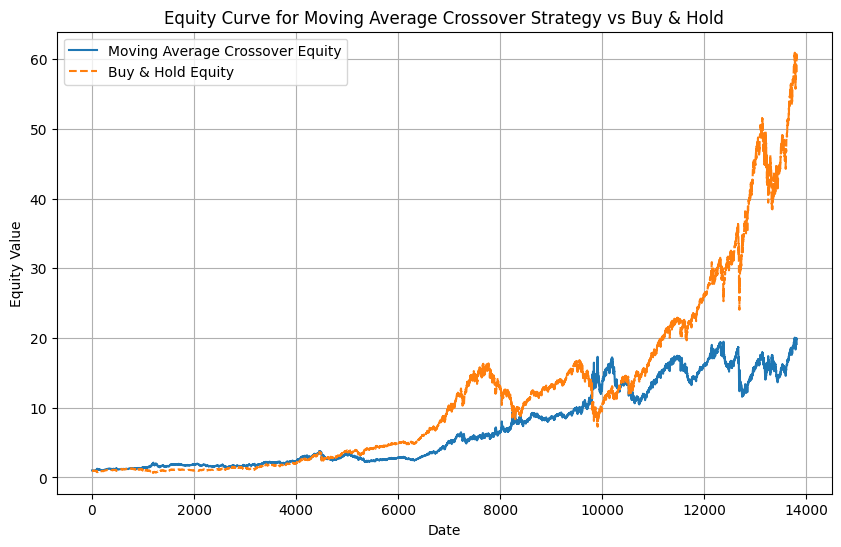

Final Equity (Strategy): 19.14
Final Equity (Buy & Hold): 58.16


In [ ]:
# Define short-term and long-term moving averages
short_window = 50
long_window = 200

# Calculate short-term and long-term moving averages
sp500_data_clean['SMA_short'] = sp500_data_clean['SPX_Price'].rolling(window=short_window, min_periods=1).mean()
sp500_data_clean['SMA_long'] = sp500_data_clean['SPX_Price'].rolling(window=long_window, min_periods=1).mean()

# Create buy and sell signals based on moving average crossovers
sp500_data_clean['Signal'] = 0  # Default: no position
sp500_data_clean['Signal'][short_window:] = np.where(
    sp500_data_clean['SMA_short'][short_window:] > sp500_data_clean['SMA_long'][short_window:], 1, -1)

# Calculate daily returns
sp500_data_clean['Returns'] = sp500_data_clean['SPX_Price'].pct_change()

# Simulate strategy performance by calculating equity curve
sp500_data_clean['Strategy_Returns'] = sp500_data_clean['Signal'].shift(1) * sp500_data_clean['Returns']

# Calculates the cumulative product of the strategy's daily returns to generate the equity curve.
sp500_data_clean['Equity'] = (1 + sp500_data_clean['Strategy_Returns']).cumprod()

# Plot the equity curve
plt.figure(figsize=(10, 6))
plt.plot(sp500_data_clean['Equity'], label='Moving Average Crossover Equity')
plt.plot((1 + sp500_data_clean['Returns']).cumprod(), label='Buy & Hold Equity', linestyle='--')
plt.title('Equity Curve for Moving Average Crossover Strategy vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Equity Value')
plt.grid(True)
plt.legend()
plt.show()

# final equity and other metrics
final_equity = sp500_data_clean['Equity'].iloc[-1]

# cumulative product of the returns: giving the growth of $1 invested in the S&P 500 over time.
buy_and_hold_final_equity = (1 + sp500_data_clean['Returns']).cumprod().iloc[-1]

print(f'Final Equity (Strategy): {final_equity:.2f}')
print(f'Final Equity (Buy & Hold): {buy_and_hold_final_equity:.2f}')

### Describe the performance of the strategy in whatever ways you think relevant. What are some things to think about this academically vs. in practice?

Based on our models, the Buy & Hold method out performs the Moving Average Crossover method by a factor of 3.

This results follows the advise of many experienced traders and even some of our class' guest speaker's beliefs. The key idea is that a model cannot properly predict the behavior of a market, so holding is a safer way to grow the assets.

In the graph above, we can see how holding teh S&P 500 leads to greater returns, whereas the Moving Average Crossover method fails to hold growing assets for too long.

Furthermore, there are two main considerations to make on the Moving Average Crossover Equity approach. Academically, the trading strategy relies solely on past prices to make decisions. This idea, was rendered to be limited by our autocorrelation analysis (see Part 2), and also goes against the Efficient Market Hypothesis. In practical terms, this strategy is more capital intensive, as it requires to make many transactions per day, which result in higher transaction costs.

## Part 1-8

###Touching then on optimization, present a methodology, and subsequent output, that you think is a reasonable approach.


To optimize the MAC strategy, we can explore various methods such as adjusting the length of the moving averages or incorporating additional technical indicators to reduce the number of false signals.

A reasonable approach might include:

1. Hyperparameter Tuning: Experimenting with different window lengths for the short-term and long-term moving averages (e.g., a 50-day and 200-day crossover) to identify the combination that minimizes volatility while maximizing returns.
2. Risk Adjusted Returns: Evaluating the performance using risk-adjusted metrics such as the Sharpe Ratio or Sortino Ratio to ensure that higher returns are not achieved at the cost of excessive risk.
3. Incorporating Stop-Loss and Take-Profit Levels: Introducing these limits can help reduce losses in downtrends while locking in gains, potentially improving overall returns.


After running the optimization model, one potential output could show that a specific set of moving average lengths (e.g., a 20-day and 100-day crossover) outperforms other combinations in terms of higher returns and lower volatility. Additionally, a reduced number of false signals could lead to fewer trades, cutting down transaction costs while maintaining favorable returns compared to the Buy & Hold strategy.

# Part 2 (Similar to Part 1-6)

**682:**

Test daily net returns, monthly net returns, and yearly net returns for autocorrelation using the autocorrelation function for 2 of the top 10 constituents of the S&P 500 and the overall S&P 500. Describe what insight this analysis provide for these series.

In [ ]:
# Function to plot ACF for given returns and title
def plot_acf_series(series, title, option):
    max_lags = min(40, len(series) - 1)  # Adjust lags based on series length
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_acf(series, lags=max_lags, ax=ax, alpha=0.05)
    # Customize the plot
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Lag', fontsize=12)
    ax.set_ylabel('ACF', fontsize=12)
    if option == 1:
        ax.set_ylim([-0.1, 0.1])
    elif option == 2:
        ax.set_ylim([-0.5, 0.5])
    else:
        ax.set_ylim([-1, 1])
    ax.grid(True)
    plt.show()

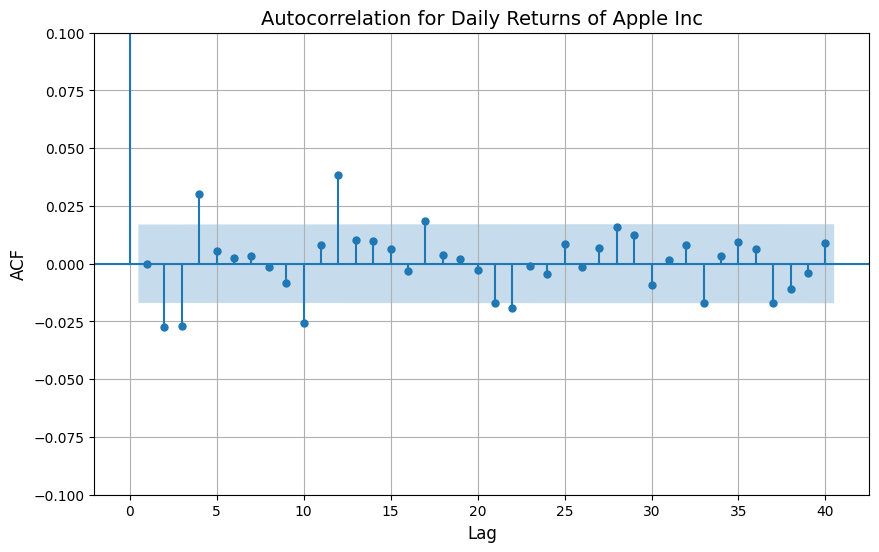

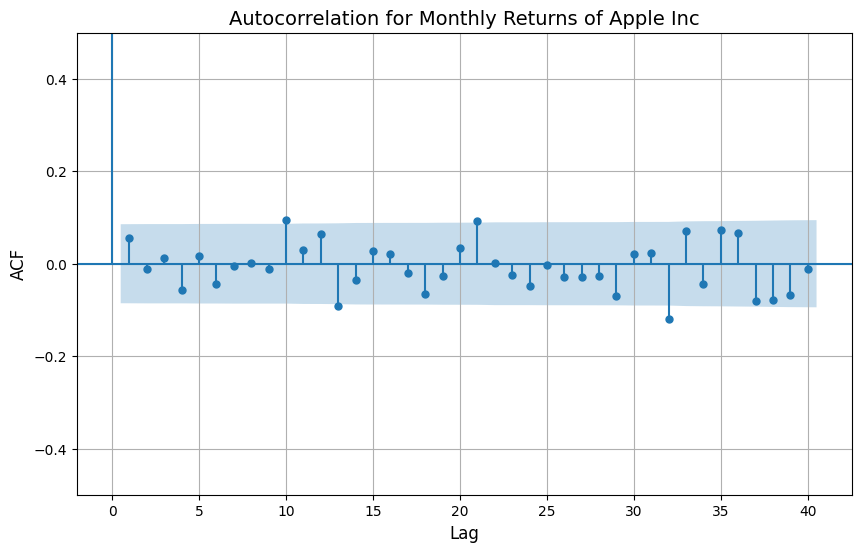

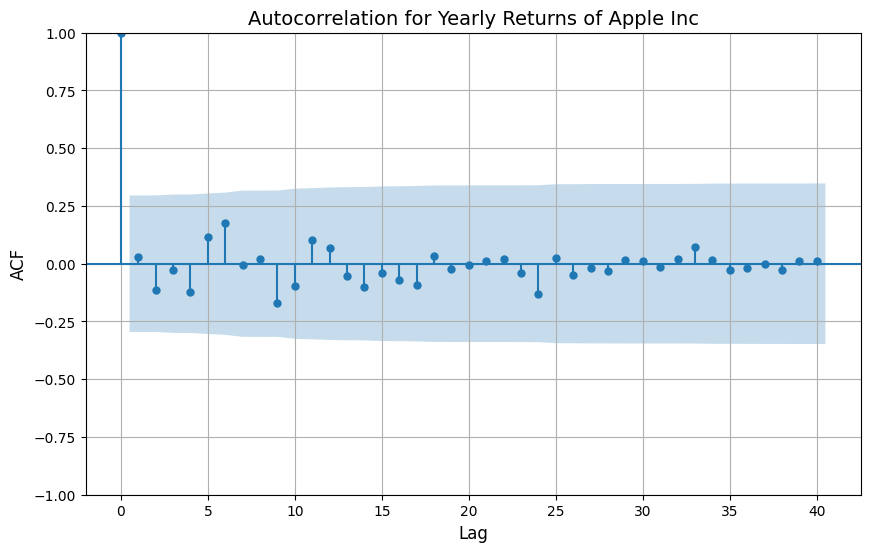

In [ ]:
# AAPL

chosen_stock1 = 'AAPL_Price'
plot_acf_series(daily_returns['AAPL_Price'].dropna(), f'Autocorrelation for Daily Returns of {company_names[chosen_stock1]}', 1)
plot_acf_series(aapl_monthly_returns['AAPL_Monthly_Return'].dropna(),
                f'Autocorrelation for Monthly Returns of {company_names[chosen_stock1]}', 2)
plot_acf_series(aapl_yearly_returns['AAPL_Yearly_Return'].dropna(),
                f'Autocorrelation for Yearly Returns of {company_names[chosen_stock1]}', 3)

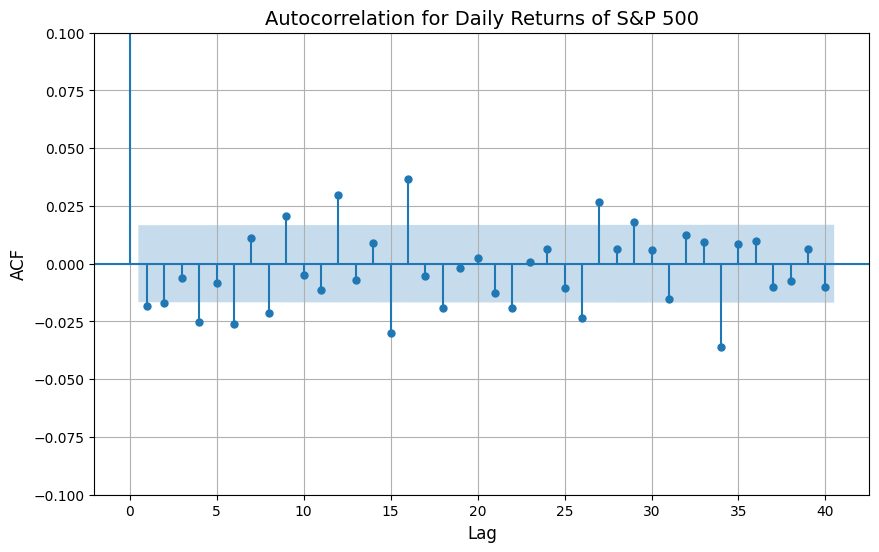

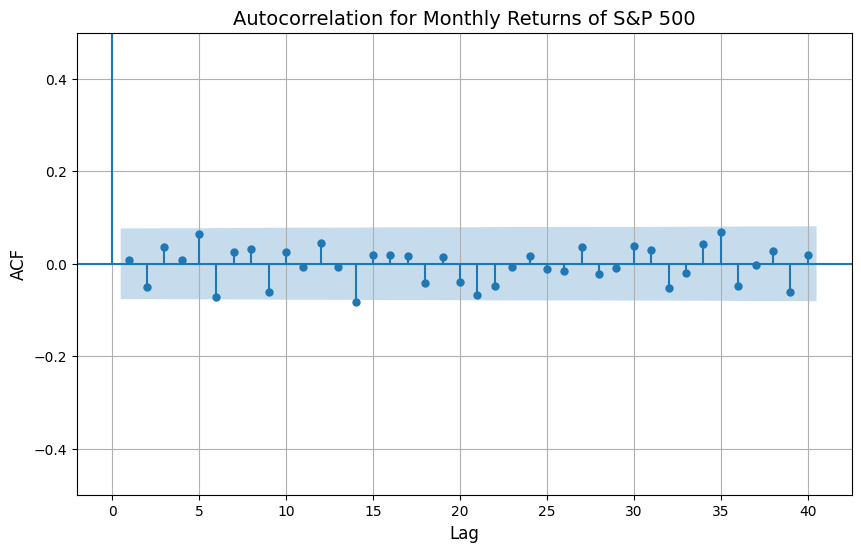

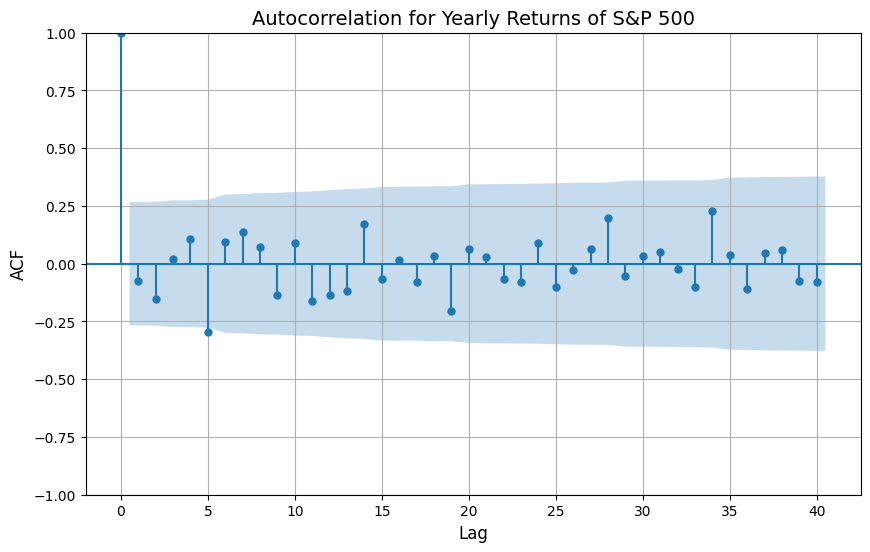

In [ ]:
# S&P 500

chosen_stock2 = 'SPX_Price'
plot_acf_series(daily_returns['SPX_Price'].dropna(), f'Autocorrelation for Daily Returns of {company_names[chosen_stock2]}', 1)
plot_acf_series(spx_monthly_returns['SPX_Monthly_Return'].dropna(),
                f'Autocorrelation for Monthly Returns of {company_names[chosen_stock2]}', 2)
plot_acf_series(spx_yearly_returns['SPX_Yearly_Return'].dropna(),
                f'Autocorrelation for Yearly Returns of {company_names[chosen_stock2]}', 3)

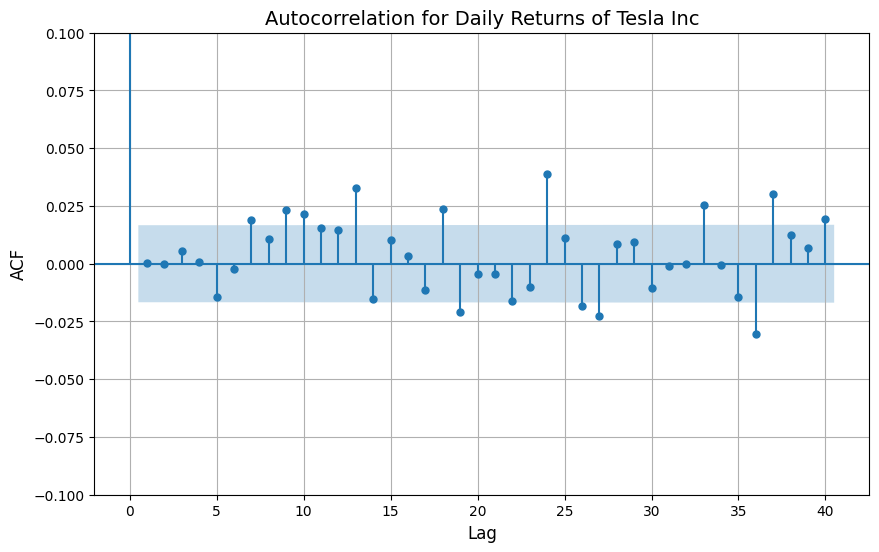

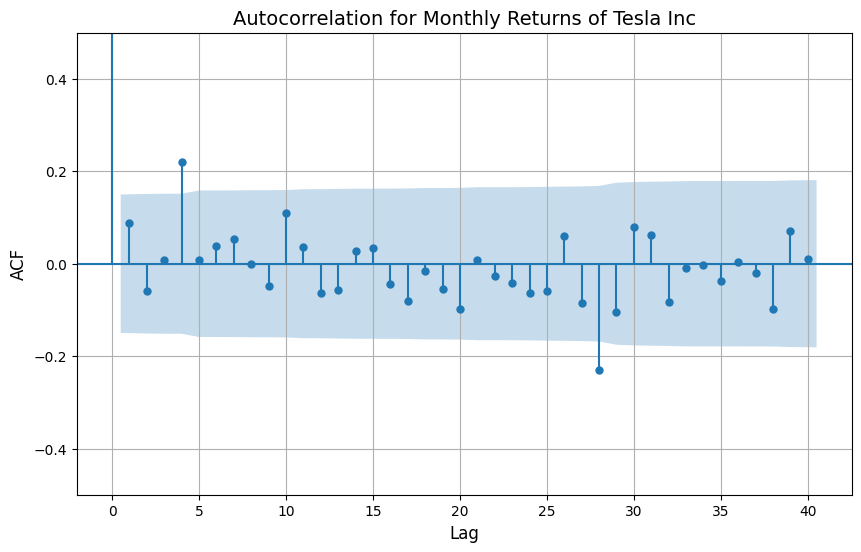

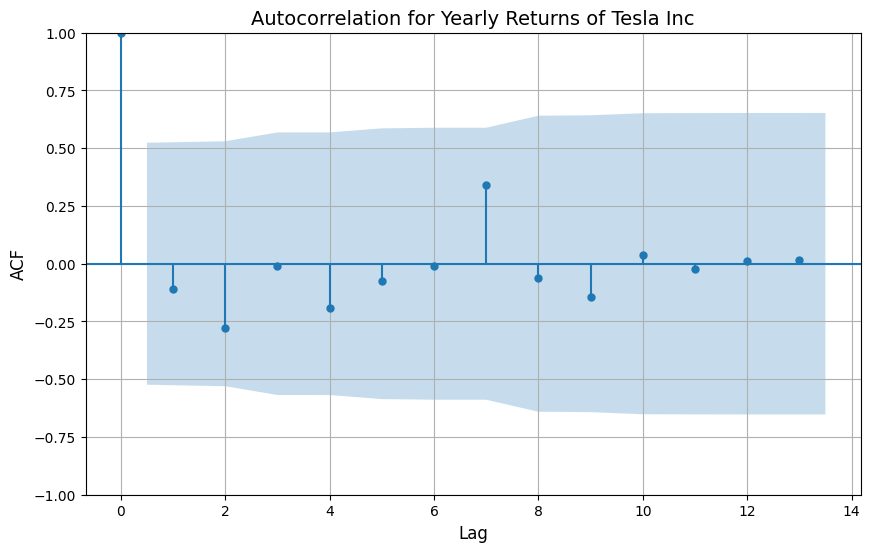

In [ ]:
# TSLA

chosen_stock3 = 'TSLA_Price'
plot_acf_series(daily_returns['TSLA_Price'].dropna(), f'Autocorrelation for Daily Returns of {company_names[chosen_stock3]}', 1)
plot_acf_series(tsla_monthly_returns['TSLA_Monthly_Return'].dropna(),
                f'Autocorrelation for Monthly Returns of {company_names[chosen_stock3]}', 2)
plot_acf_series(tsla_yearly_returns['TSLA_Yearly_Return'].dropna(),
                f'Autocorrelation for Yearly Returns of {company_names[chosen_stock3]}', 3)

## Insight Analysis (AAPL, S&P 500, TSLA)

The previous 9 graphs show the different asset's autocorrelations with the max amount of lag possible on each timepoint. The graphs show the daily, monthly and yearly returns respectively. On top of this, a confidence boundary was graphed in blue. The value of this is that points on the blue area are considered statistically irrelevant, wheras points moving away from the area are considered progressively more relevant.
### AAPL
For the daily returns, out of the 40 points, only 5 were outside the confidence bounds. Out of these 5 points, 3 show negative autocorrelation, and 2 show positive autocorrelation. However, fixating on these points is statistically insignificant, as the vast majority of points lie within the confidence bounds, meaning that there is no autocorrelation.

A similar idea is seen in the monthly and yearly graphs. In the monthly return graphs, 4 points lie outside the boundary, and in the yearly one, no points do.

This allows us to conclude that as we consider broader time frames, less autocorrelation is demonstrated. Finally, this means that there is no correlation between the stock price in one day and the next.
### S&P 500
A similar tendency to that of Apple's graphs occur. Daily returns show spurious bursts of positive and negative autocorrelation, whereas monthly and yearly autocorrelations don't. All things considered, the three graphs for the S&P 500 have no considerable autocorrelation.
### TSLA
As expected by a more volatile asset, Tesla's stock appears to have more points outside the confidence boundary in the daily returns graph. However, neither a positive or negative autocorrelation pattern can be spotted from the graph visually.

As in the other cases, the monthly returns graph shows no relevant autocorrelation indications. The same thing happens with the yearly returns graph. Something to note about this last graph is that, as Tesla is a newer company, there aren't enough timepoints to do a more complete analysis on autocorrelation, so even if there were a hint of this (which there doesn't appear to be) it wouldn't be fair to compare it directly to the other stocks.

Finally we can conclude that the Efficient Market Hypothesis stands, as we would not be able to beat the market consistently by looking at these graphs by themselves, for there is no clear or significant autocorrelation in any of the stocks.

# Part 3 (Similar to Part 1-3)

**682:**

Create a graph that displays the risk/reward profile for all 11 of the GIC sectors using price data from SPDR Sector ETFs

In [ ]:
gic_data = pd.read_excel('Homework 1 Data.xlsx', sheet_name='GIC SECTOR DATA')

# Define column names (adjust for 33 columns)
gic_columns = ['Date_XLC', 'XLC_Price', 'XLC_Volume',
           'Date_XLY', 'XLY_Price', 'XLY_Volume',
           'Date_XLP', 'XLP_Price', 'XLP_Volume',
           'Date_XLE', 'XLE_Price', 'XLE_Volume',
           'Date_XLF', 'XLF_Price', 'XLF_Volume',
           'Date_XLV', 'XLV_Price', 'XLV_Volume',
           'Date_XLI', 'XLI_Price', 'XLI_Volume',
           'Date_XLB', 'XLB_Price', 'XLB_Volume',
           'Date_XLRE', 'XLRE_Price', 'XLRE_Volume',
           'Date_XLK', 'XLK_Price', 'XLK_Volume',
           'Date_XLU', 'XLU_Price', 'XLU_Volume']


gic_data_clean = gic_data.copy()
gic_data_clean= gic_data_clean.drop([0, 1])  # Dropping the first two metadata rows
gic_data_clean.columns = gic_columns

gic_data_clean.head()

,Date_XLC,XLC_Price,XLC_Volume,Date_XLY,XLY_Price,XLY_Volume,Date_XLP,XLP_Price,XLP_Volume,Date_XLE,...,XLB_Volume,Date_XLRE,XLRE_Price,XLRE_Volume,Date_XLK,XLK_Price,XLK_Volume,Date_XLU,XLU_Price,XLU_Volume
2,2018-06-19 00:00:00,49.96,16588,1998-12-22 00:00:00,25.0313,5700,1998-12-22 00:00:00,26.5,150300,1998-12-22 00:00:00,...,1900,2015-10-08 00:00:00,30.21,2000,1998-12-22 00:00:00,32.0469,300500,1998-12-22 00:00:00,29.8281,7900
3,2018-06-20 00:00:00,50.58,189989,1998-12-23 00:00:00,25.5938,18100,1998-12-23 00:00:00,27.1406,44000,1998-12-23 00:00:00,...,700,2015-10-09 00:00:00,30.16,4335,1998-12-23 00:00:00,32.8125,338300,1998-12-23 00:00:00,29.7031,24100
4,2018-06-21 00:00:00,50.27,428740,1998-12-24 00:00:00,25.75,4900,1998-12-24 00:00:00,27.0938,45500,1998-12-24 00:00:00,...,1500,2015-10-12 00:00:00,30.3499,2250,1998-12-24 00:00:00,32.6875,243700,1998-12-24 00:00:00,30.25,23800
5,2018-06-22 00:00:00,50.49,181638,1998-12-28 00:00:00,25.375,15500,1998-12-28 00:00:00,26.9375,25400,1998-12-28 00:00:00,...,2500,2015-10-13 00:00:00,30.16,508,1998-12-28 00:00:00,32.7813,309300,1998-12-28 00:00:00,30.0938,3100
6,2018-06-25 00:00:00,49.45,2509603,1998-12-29 00:00:00,25.9375,5300,1998-12-29 00:00:00,27.5313,123500,1998-12-29 00:00:00,...,100,2015-10-15 00:00:00,30.07,2515,1998-12-29 00:00:00,32.875,123800,1998-12-29 00:00:00,30.5938,12000


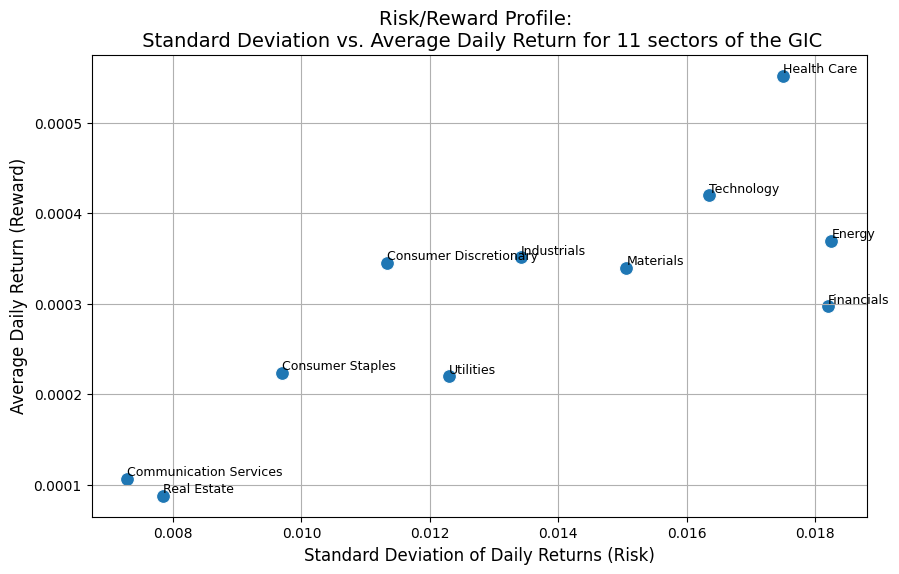

In [ ]:
gic_names = {
    'XLC': 'Communication Services',
    'XLY': 'Consumer Discretionary',
    'XLP': 'Consumer Staples',
    'XLE': 'Energy',
    'XLF': 'Financials',
    'XLV': 'Health Care',
    'XLI': 'Industrials',
    'XLB': 'Materials',
    'XLRE': 'Real Estate',
    'XLK': 'Technology',
    'XLU': 'Utilities',
}

gic_price_columns = ['XLC_Price', 'XLY_Price', 'XLP_Price', 'XLE_Price', 'XLF_Price',
                 'XLV_Price', 'XLI_Price', 'XLB_Price', 'XLRE_Price', 'XLK_Price', 'XLU_Price']

# Extract the price data
gic_prices = gic_data_clean[gic_price_columns].astype(float)

# Calculate daily returns
gic_daily_returns = gic_prices.pct_change()

# average return and standard deviation of returns
gic_summary_stats = gic_daily_returns.agg(['mean', 'std']).transpose().reset_index()
gic_summary_stats.columns = ['Stock', 'avg_return', 'sd_return']

# Plotting the scatter plot with risk on the X-axis and reward on the Y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=gic_summary_stats, x='sd_return', y='avg_return', s=100)

# Adding labels to the points using the full company names
for i in range(gic_summary_stats.shape[0]):
    gic_name = gic_names[gic_summary_stats['Stock'][i].replace("_Price", '')]
    plt.text(gic_summary_stats['sd_return'][i],
             gic_summary_stats['avg_return'][i],
             gic_name, fontsize=9, verticalalignment='bottom')

# Adding plot titles and labels with the correct risk/reward axis labels
plt.title('Risk/Reward Profile: \n Standard Deviation vs. Average Daily Return for 11 sectors of the GIC', fontsize=14)
plt.xlabel('Standard Deviation of Daily Returns (Risk)', fontsize=12)
plt.ylabel('Average Daily Return (Reward)', fontsize=12)

plt.grid(True)
plt.show()